<a href="https://colab.research.google.com/github/RanojoyBiswas/Email-Campaign-Effectiveness-Prediction/blob/main/Email_Campaign_Effectiveness_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Email Campaign Effectiveness Prediction:**

##**Problem Description**

Most of the small to medium business owners are making effective use of Gmail-based
Email marketing Strategies for offline targeting of converting their prospective customers into
leads so that they stay with them in business.
The main objective is to create a machine learning model to characterize the mail and track
the mail that is ignored; read; acknowledged by the reader.
Data columns are self-explanatory.

## **Introduction:**

Email campaign is a sequence of marketing efforts that contacts multiple recipients at once. Email campaigns are designed to reach out to subscribers at the best time and provide valuable content and relevant offers. Using email campaigns allows businesses to build deep and trusting relationships with their customers.


Email marketing makes communication with clients easier and more effective. Email campaigns are a powerful medium between a business company and it's audience. They help not only to increase sales but build brand image. Below, some objectives are listed that can be achieved by doing email marketing campaigns.



* <b>Emails help nurture leads:</b> Each new lead requires nurturing before making his/her first purchase. The task of the marketing team is to provide them with the right educational materials. They include how-to guides, live demos, workshops, webinars, useful checklists, tutorials, etc. Each email will make a user move down the sales funnel. Predict all possible pain points that a user may face when dealing with the brand and eliminate them.
* <b>Emails help keep customers engaged:</b> Now it’s getting much harder to stir users’ interest in a brand. So, one has to come up with new formats and new offers. Email is just the place for experiments. Via this channel, important information can be shared, expertise can be showcased, and the businesses can offer exclusive deals.
* <b>With emails, you can collect data about subscribers:</b> To provide every user with an individual approach or get an idea about similar users, informations need to be collected about them. With an email campaign, this task is as easy as pie. All that is needed is to ask subscribers to share some important data to craft more targeted and personalized offers. Then, divideing all the list into segments, the businesses can send relevant content to each group.
* <b>Emails help convert:</b> With all this information about the clients, unique promotions can be created for each user. Tracking their interactions with the brand, it is easy to know their favorite products and buying habits — this will help send emails triggered by clients’ actions. As a result, email performance and sales will increase.
* <b>Emails help your business improve:</b> Asking clients for feedback is important. Can be done right after the purchase or on a regular basis via a survey. It's helpful to find out what customers appreciate the most about the brand, which difficulties they face, and what they would improve.

## Attributes Information:

* **Email Id** - It contains the email id's of the customers/individuals
* **Email Type** - There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business.
* **Subject Hotness Score** - It is the email's subject's score on the basis of how good and effective the content is.
* **Email Source** - It represents the source of the email like sales and marketing or important admin mails related to the product.
* **Email Campaign Type** - The campaign type of the email.
* **Total Past Communications** - This column contains the total previous mails from the same source, the number of communications had.
* **Customer Location** - Contains demographical data of the customer, the location where the customer resides.
* **Time Email sent Category** - It has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.
* **Word Count** - The number of words contained in the email.
* **Total links** - Number of links in the email.
* **Total Images** - Number of images in the email.
* **Email Status** - Our target variable which contains whether the mail was ignored, read, acknowledged by the reader.

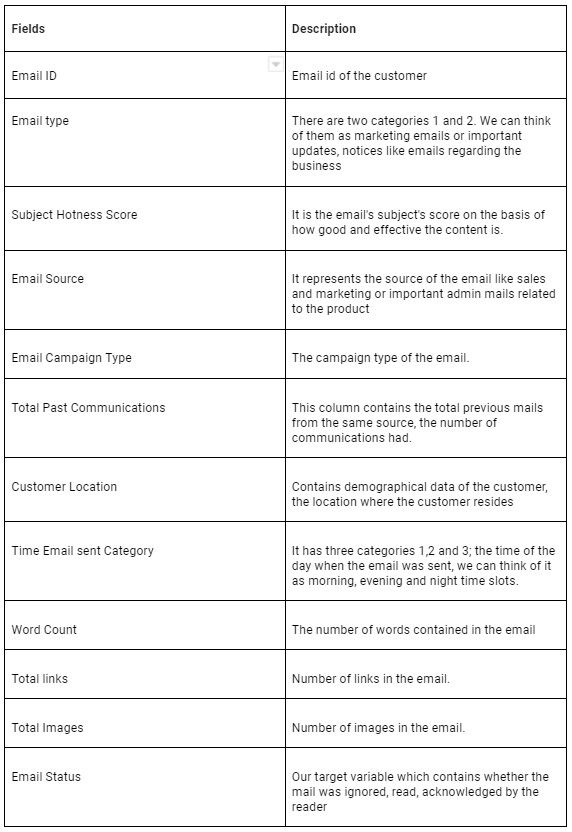

## **Approach:**

Our goal in this project is to predict whether a mail sent to a client will be ignored, read or acknowledged based on the different attributes that have been provided.

Performing Exploratory data analysis will help us understand the features and relationships that they have and their impact on the target or the client's responce. We will try to find out important features and we will do feature engineering.

Data is labeled and the target column being categorical, we shall implement classification based machine learning algorithms to complete the prediction task.

## **Data Collection & Summary:**

Very first step is to import the libraries for the task. We shall start off by importing the absolute necessary packages and as we continue working on the data, we will be adding more to the list.

In [ ]:
#invite people for the party
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import missingno as msno
from scipy.stats import norm
from scipy import stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

from sklearn.model_selection import train_test_split

from statsmodels.stats.outliers_influence import variance_inflation_factor
from scipy.stats import pearsonr # Pearson's r

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import MultiLabelBinarizer
from datetime import datetime, timezone, timedelta


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC #Support vector classifier
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from lightgbm import LGBMClassifier


from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score

from scipy.stats import zscore
from sklearn import metrics
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score, precision_score, f1_score, recall_score, classification_report

In [ ]:
sns.set(font_scale = 1.5)

In [ ]:
pip install imblearn

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Importing SMOTE for oversampling and NearMiss for undersampling

In [ ]:
# importing SMOTE for oversampling
from imblearn.over_sampling import SMOTE
smote = SMOTE()

# Nearmiss for undersampling
from imblearn.under_sampling import NearMiss
# Undersampling to handle the imbalance
nm = NearMiss()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# reading data set
dataset = pd.read_csv('/content/drive/MyDrive/ML Classification Projects/Email Campaign Effectiveness Prediction - Ranajay Biswas/Datasets & Resources/data_email_campaign.csv',  encoding= 'unicode_escape')

In [ ]:
pd.set_option('display.max_columns', None)

In [ ]:
# top 5 rows of the data
dataset.head()

Email_ID  Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0  EMA00081000034500           1                    2.2                  2   
1  EMA00081000045360           2                    2.1                  1   
2  EMA00081000066290           2                    0.1                  1   
3  EMA00081000076560           1                    3.0                  2   
4  EMA00081000109720           1                    0.0                  2   

  Customer_Location  Email_Campaign_Type  Total_Past_Communications  \
0                 E                    2                       33.0   
1               NaN                    2                       15.0   
2                 B                    3                       36.0   
3                 E                    2                       25.0   
4                 C                    3                       18.0   

   Time_Email_sent_Category  Word_Count  Total_Links  Total_Images  \
0                         1         440          8.0           0.0   
1                         2         504          5.0           0.0   
2                         2         962          5.0           0.0   
3                         2         610         16.0           0.0   
4                         2         947          4.0           0.0   

   Email_Status  
0             0  
1             0  
2             1  
3             0  
4             0

In [ ]:
# last 5 rows of the data
dataset.tail()

Email_ID  Email_Type  Subject_Hotness_Score  \
68348  EMA00089995974500           2                    0.4   
68349  EMA00089998225300           1                    1.3   
68350  EMA00089998436500           1                    2.2   
68351  EMA00089999168800           1                    0.4   
68352  EMA00089999316900           1                    1.5   

       Email_Source_Type Customer_Location  Email_Campaign_Type  \
68348                  1                 F                    2   
68349                  1                 C                    2   
68350                  2               NaN                    2   
68351                  1                 E                    2   
68352                  1                 G                    2   

       Total_Past_Communications  Time_Email_sent_Category  Word_Count  \
68348                       22.0                         3         737   
68349                       40.0                         2         653   
68350                       33.0                         2         490   
68351                       50.0                         1         733   
68352                       20.0                         2        1038   

       Total_Links  Total_Images  Email_Status  
68348         16.0          13.0             0  
68349         31.0          16.0             0  
68350          9.0           0.0             0  
68351         14.0           4.0             0  
68352          6.0           0.0             0

In [ ]:
# checking the shape of our data
dataset.shape

(68353, 12)

In [ ]:
# checking columns
# dataset.columns.tolist()

In [ ]:
# datatypes and null values overview
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_ID                   68353 non-null  object 
 1   Email_Type                 68353 non-null  int64  
 2   Subject_Hotness_Score      68353 non-null  float64
 3   Email_Source_Type          68353 non-null  int64  
 4   Customer_Location          56758 non-null  object 
 5   Email_Campaign_Type        68353 non-null  int64  
 6   Total_Past_Communications  61528 non-null  float64
 7   Time_Email_sent_Category   68353 non-null  int64  
 8   Word_Count                 68353 non-null  int64  
 9   Total_Links                66152 non-null  float64
 10  Total_Images               66676 non-null  float64
 11  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(2)
memory usage: 6.3+ MB


### *Dataset has 68353 rows and 12 columns. And it contains object, integer and float data types*...

### <b>Descriptive Stats ---

In [ ]:
# descriptive statistics
dataset.describe(percentiles=[.1, .9])

Email_Type  Subject_Hotness_Score  Email_Source_Type  \
count  68353.000000           68353.000000       68353.000000   
mean       1.285094               1.095481           1.456513   
std        0.451462               0.997578           0.498109   
min        1.000000               0.000000           1.000000   
10%        1.000000               0.100000           1.000000   
50%        1.000000               0.800000           1.000000   
90%        2.000000               2.500000           2.000000   
max        2.000000               5.000000           2.000000   

       Email_Campaign_Type  Total_Past_Communications  \
count         68353.000000               61528.000000   
mean              2.272234                  28.933250   
std               0.468680                  12.536518   
min               1.000000                   0.000000   
10%               2.000000                  13.000000   
50%               2.000000                  28.000000   
90%               3.000000                  46.000000   
max               3.000000                  67.000000   

       Time_Email_sent_Category    Word_Count   Total_Links  Total_Images  \
count              68353.000000  68353.000000  66152.000000  66676.000000   
mean                   1.999298    699.931751     10.429526      3.550678   
std                    0.631103    271.719440      6.383270      5.596983   
min                    1.000000     40.000000      1.000000      0.000000   
10%                    1.000000    352.000000      4.000000      0.000000   
50%                    2.000000    694.000000      9.000000      0.000000   
90%                    3.000000   1082.000000     21.000000     11.000000   
max                    3.000000   1316.000000     49.000000     45.000000   

       Email_Status  
count  68353.000000  
mean       0.230934  
std        0.497032  
min        0.000000  
10%        0.000000  
50%        0.000000  
90%        1.000000  
max        2.000000

Some numerical features look skewed. But we shall have a better idea about it during the EDA.

## **Exploratory Data Analysis:**

### *Discovering if there are any Null values in the data* ---

In [ ]:
def missing_value_checker(dataframe):

  '''this function takes a dataframe as input and returns the count 
      and percentage of data that are misssing in each column'''

  # checking the number of null values
  number_missing = dataframe.isnull().sum()

  # checking the number of null values
  percent_missing = round(dataframe.isnull().sum() * 100 / len(dataframe), 2)

  # dataframe containing the count & percentage
  dat = pd.DataFrame(list(zip(list(dataframe.columns), number_missing, percent_missing)) , columns =['feature','observations_missing', 'percentage_missing']).set_index('feature')

  return dat

In [ ]:
missing = missing_value_checker(dataset)
missing.sort_values('observations_missing', ascending = False)

observations_missing  percentage_missing
feature                                                            
Customer_Location                         11595               16.96
Total_Past_Communications                  6825                9.98
Total_Links                                2201                3.22
Total_Images                               1677                2.45
Email_ID                                      0                0.00
Email_Type                                    0                0.00
Subject_Hotness_Score                         0                0.00
Email_Source_Type                             0                0.00
Email_Campaign_Type                           0                0.00
Time_Email_sent_Category                      0                0.00
Word_Count                                    0                0.00
Email_Status                                  0                0.00

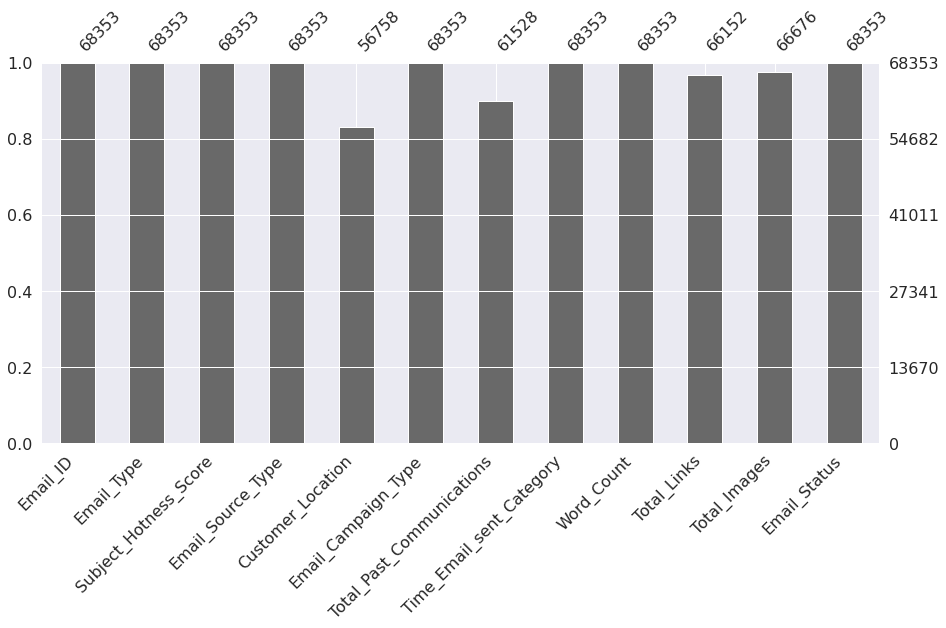

In [ ]:
# plotting for null values
msno.bar(dataset, figsize = (15,7))

It shows that there are many null values in the data.. Customer Location has roughly 17%, Total_Past_Communications has 10%, Total_Links has 3.22% and Total_Images column has 2.5% null values...

### *Checking for duplicate values in the data..*

In [ ]:
# duplicate
len(dataset[dataset.duplicated()])

0

 No duplicate values found in the data...

In [ ]:
# making a copy of the original dataset 
df = dataset.copy()

### *Dependent Variable:*

The target or the dependent variable is 'Email_Status' and it's a categorical column containing 3 unique values- 'Ignored', 'Read', 'Acknowledged'. Let's check the occurances and the distributions.

In [ ]:

df['Email_Status'].value_counts()

0    54941
1    11039
2     2373
Name: Email_Status, dtype: int64

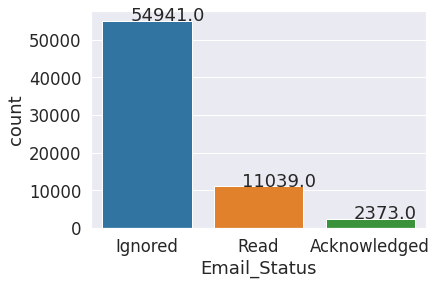

In [ ]:
# visualize the target variable
g = sns.countplot(df['Email_Status'], palette = "tab10")
g.set_xticklabels(['Ignored','Read', 'Acknowledged'])
for p in g.patches:
  g.annotate('{:.1f}'.format(p.get_height()), (p.get_x()+0.25, p.get_height()+0.01))
plt.show()

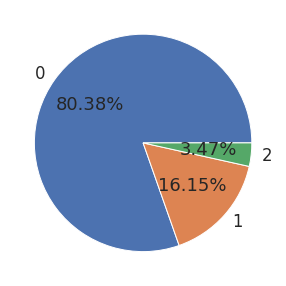

In [ ]:
data = df["Email_Status"].value_counts()
plt.figure(figsize=(10, 5))
plt.pie(data,autopct='%1.2f%%',labels=data.index)
plt.show()

Dataset is highly imbalanced. Only 3.5% of total sent emails were acknowledged. 16% were read and more than 80% were ignored.

### *Histograms of the features*:

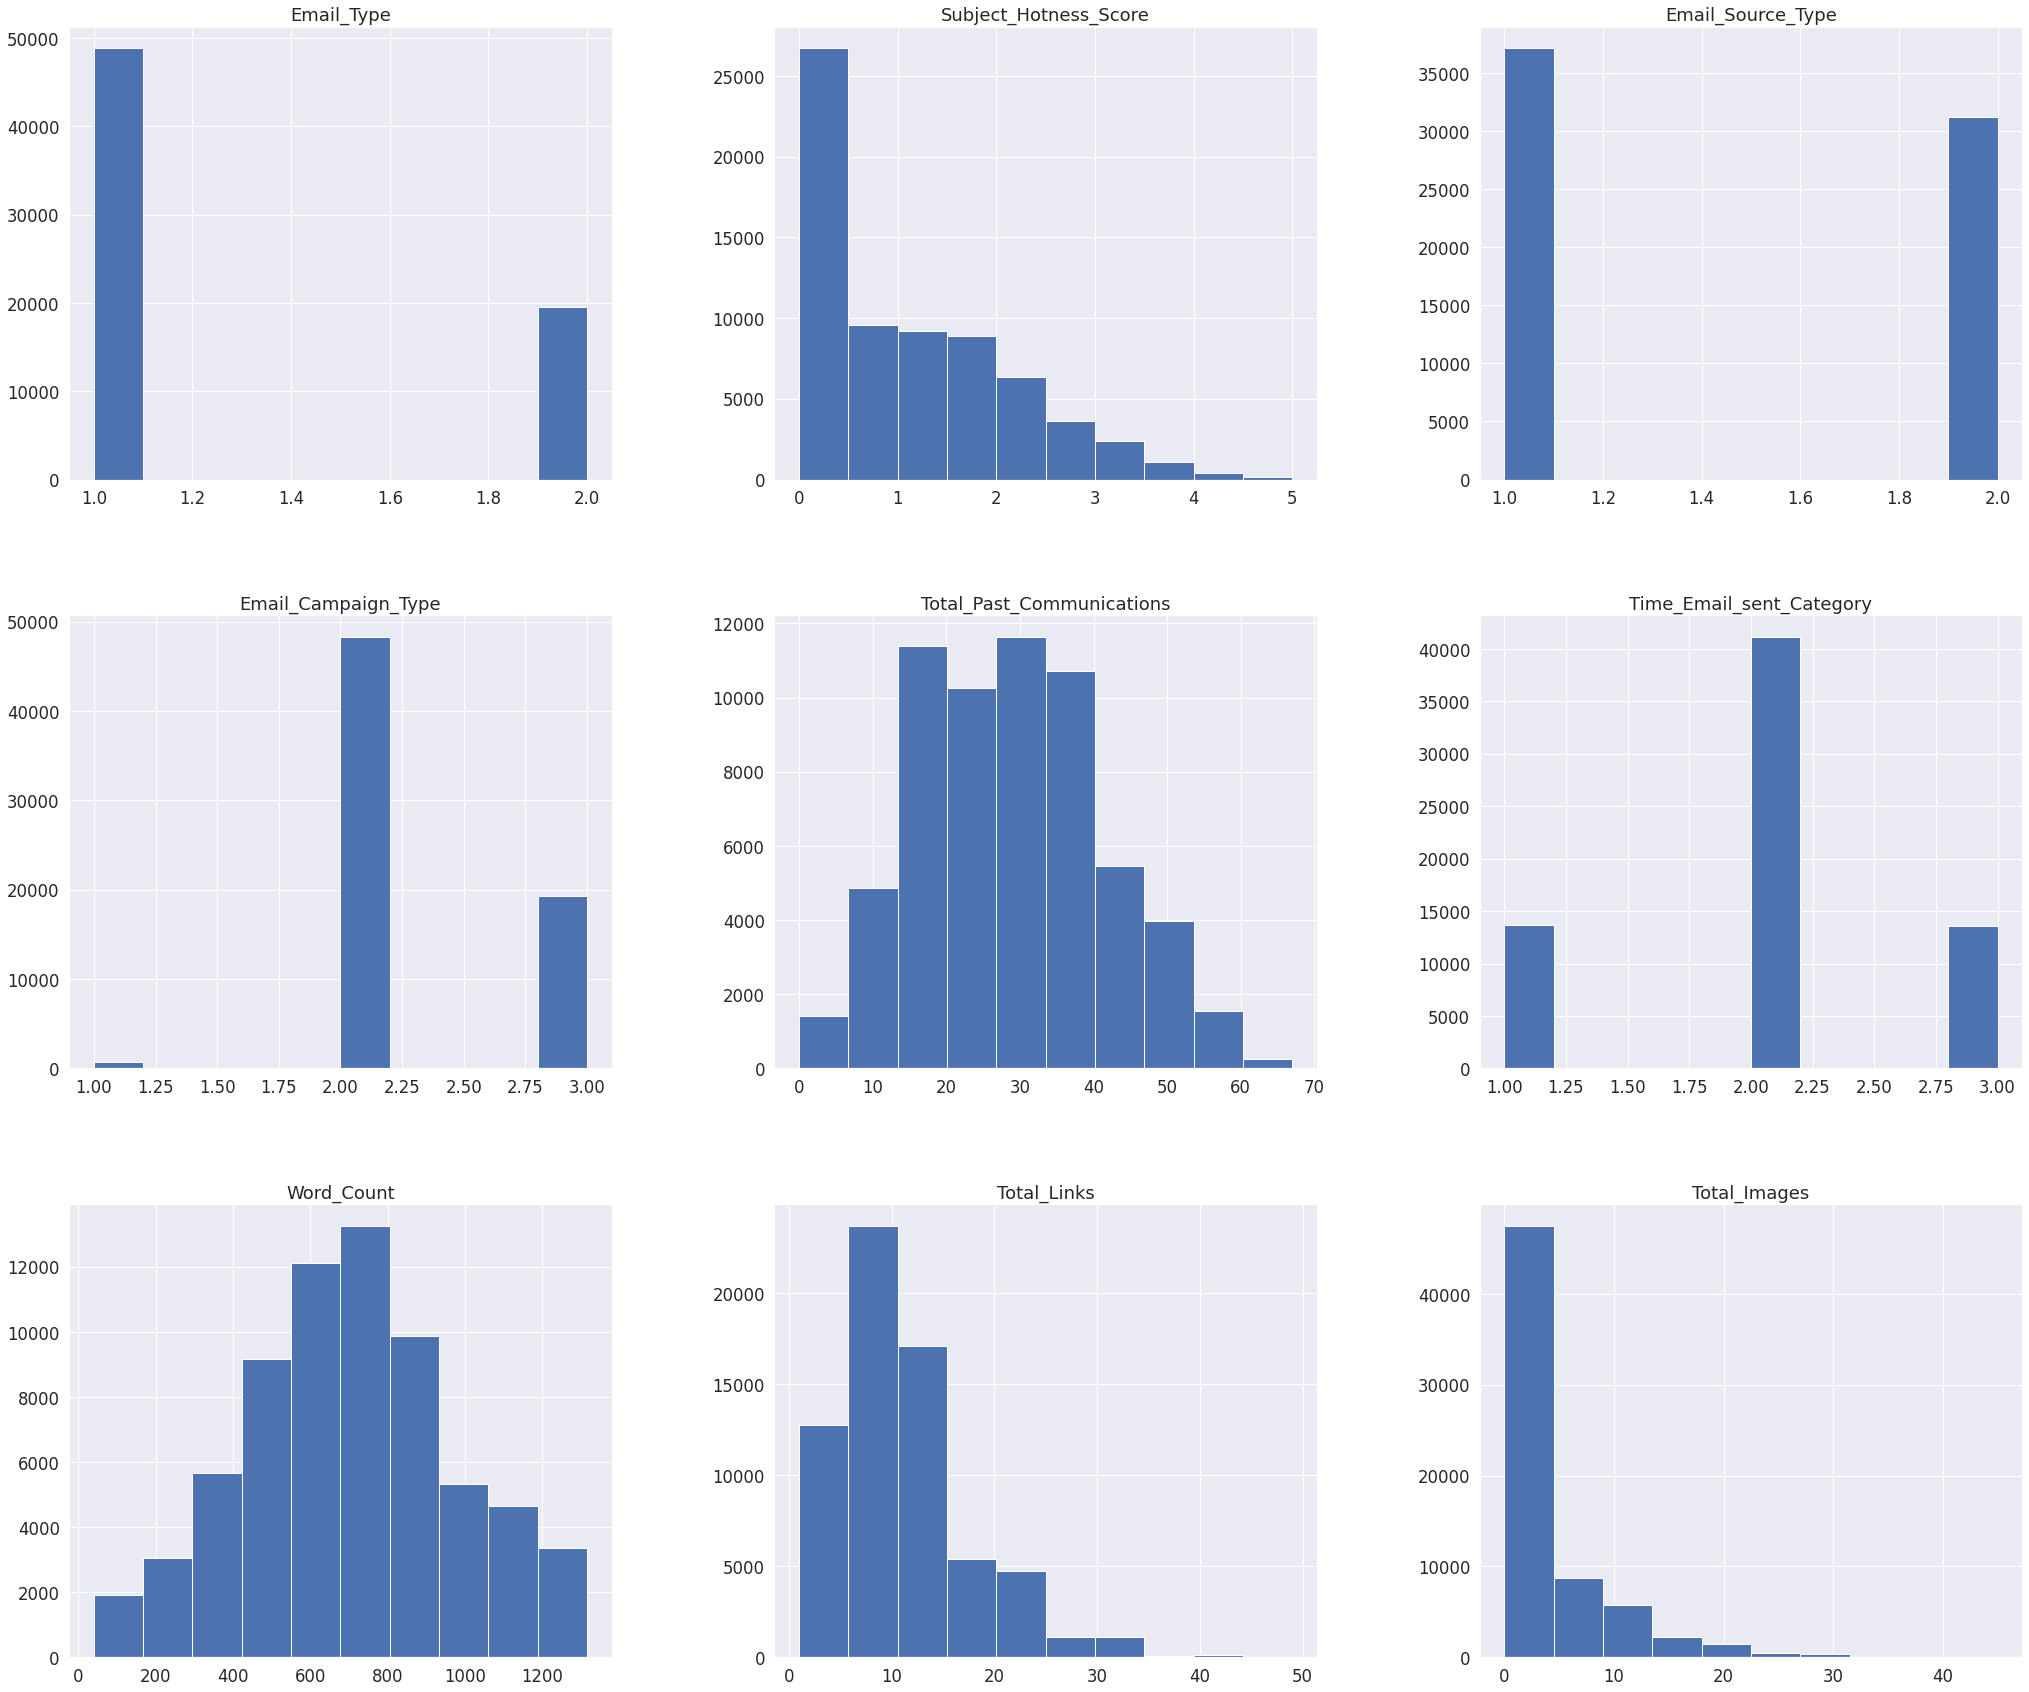

In [ ]:
# Looking at the histograms of the data

df[df.drop(['Email_Status'], axis = 1).columns].hist(figsize = (35,30))
plt.show()

### *Identifying and Separating categorical columns from Numerical columns:*

**Categorical** columns in the data:

In [ ]:
cat_cols = []

for col in df.columns:
  if len(df[col].unique()) < 10: # any column with less than ten unique values
    cat_cols.append(col)

print(f'We have {len(cat_cols)} categorical columns in the data, which are - {cat_cols}')

We have 6 categorical columns in the data, which are - ['Email_Type', 'Email_Source_Type', 'Customer_Location', 'Email_Campaign_Type', 'Time_Email_sent_Category', 'Email_Status']


Since, 'Email_Status' is the target, we are dropping that column from our categorical features list.

In [ ]:
cat_cols.remove('Email_Status')

So, we are left with only 5 categorical features. Let's check these unique values in the categorical columns:

### Analysis of Categorical features:

In [ ]:
def get_unique_values(dataframe, cat_features):
  
  '''takes a dataframe and a list of categorical feature names as input and
  returns a Dictionary{} containing the name of the column
  and list of unique values in each of those columns'''

  unique_vals = {}
  for i in cat_features:
    if i in dataframe.columns:
      unique_vals[i] = list(dataframe[i].unique())

  return (unique_vals)

Unique values in the Independent categorical features -

In [ ]:
get_unique_values(df, cat_cols)

{'Email_Type': [1, 2],
 'Email_Source_Type': [2, 1],
 'Customer_Location': ['E', nan, 'B', 'C', 'G', 'D', 'F', 'A'],
 'Email_Campaign_Type': [2, 3, 1],
 'Time_Email_sent_Category': [1, 2, 3]}

In [ ]:
def catcountplot(data, x_col, y_col, y_labels, perc = 0, color = 'hls'):

  '''Function that will plot the count plots for the indepedent feature
      and separately and also based on the categorical target column.
      Takes 'perc = 1' for plotting of percentage count'''

  plt.figure(figsize=(12,7))
  # sns.color_palette("tab10")

  # Distribution of Independent column
  fig, ax = plt.subplots(1, 2, sharex=True, figsize=(25,8), constrained_layout=True)
  sns.countplot(data[x_col],color="b", ax=ax[0])
  ax[0].set_title(f"Distribution of {x_col}")
  
  # Distribution of Independent col based on Dependent col 
  # plt.figure(figsize=(12,7))
  sns.countplot(x=data[x_col], hue=data[y_col], data=pd.melt(data) , palette = color, ax=ax[1])
  ax[1].set_title(f"{x_col} vs {y_col}")
  plt.ylabel("Count of Observations")
  plt.legend(y_labels)
  total = float(len(data))
  if perc == 1:
    for p in ax[1].patches:
      percentage = '{:.1f}%'.format(100* p.get_height().round(2)/total)
      x = p.get_x() + p.get_width()
      y = p.get_height()
      ax[1].annotate(percentage, (x, y), ha="center",va="bottom")
  fig.show()

**Customer Location vs Email Status:**

<Figure size 864x504 with 0 Axes>

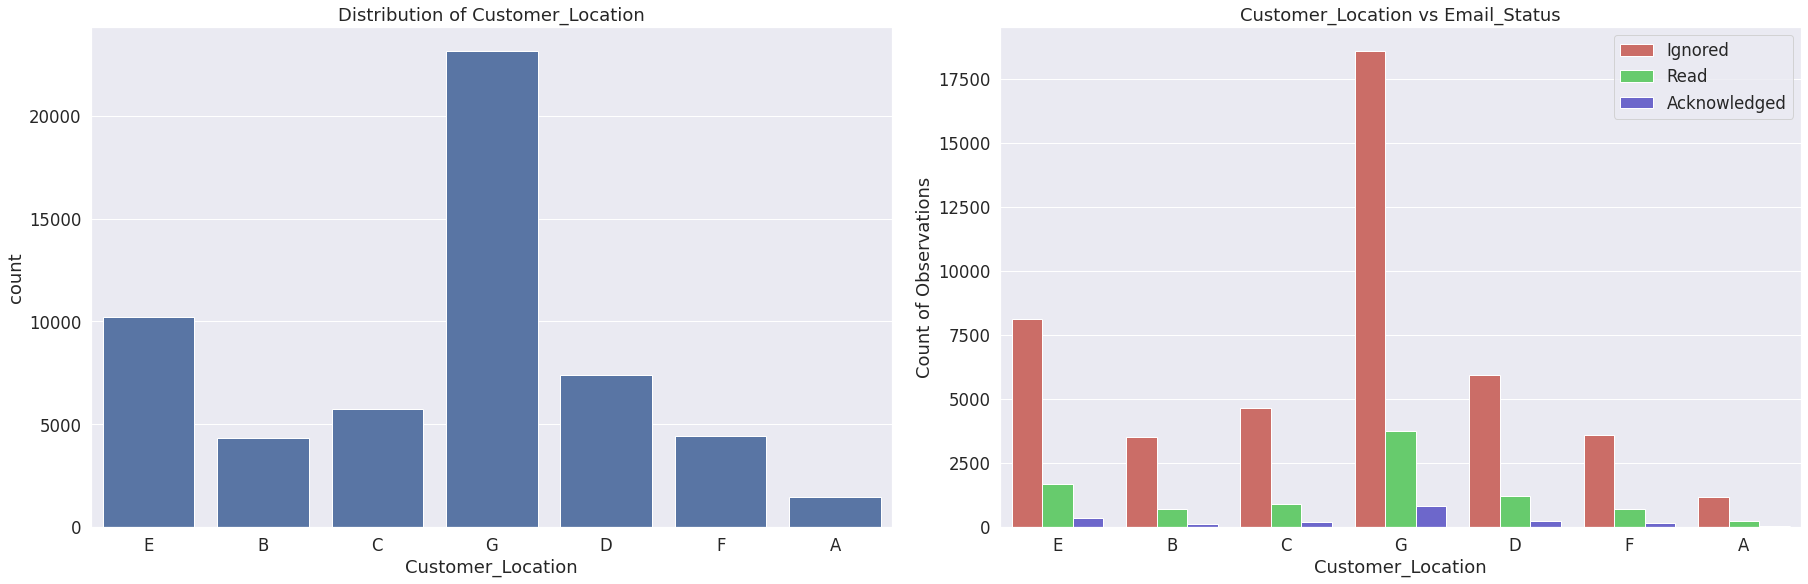

In [ ]:
catcountplot(df, 'Customer_Location', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

Regardless of the demographic, the class label distribution for the dependent column is similar. So, we can say that 'Customer_Location' does not have any strong relationship with the client's response or the 'Email_Status' column.

<B>Email_Campaign_Type vs Email_status:

<Figure size 864x504 with 0 Axes>

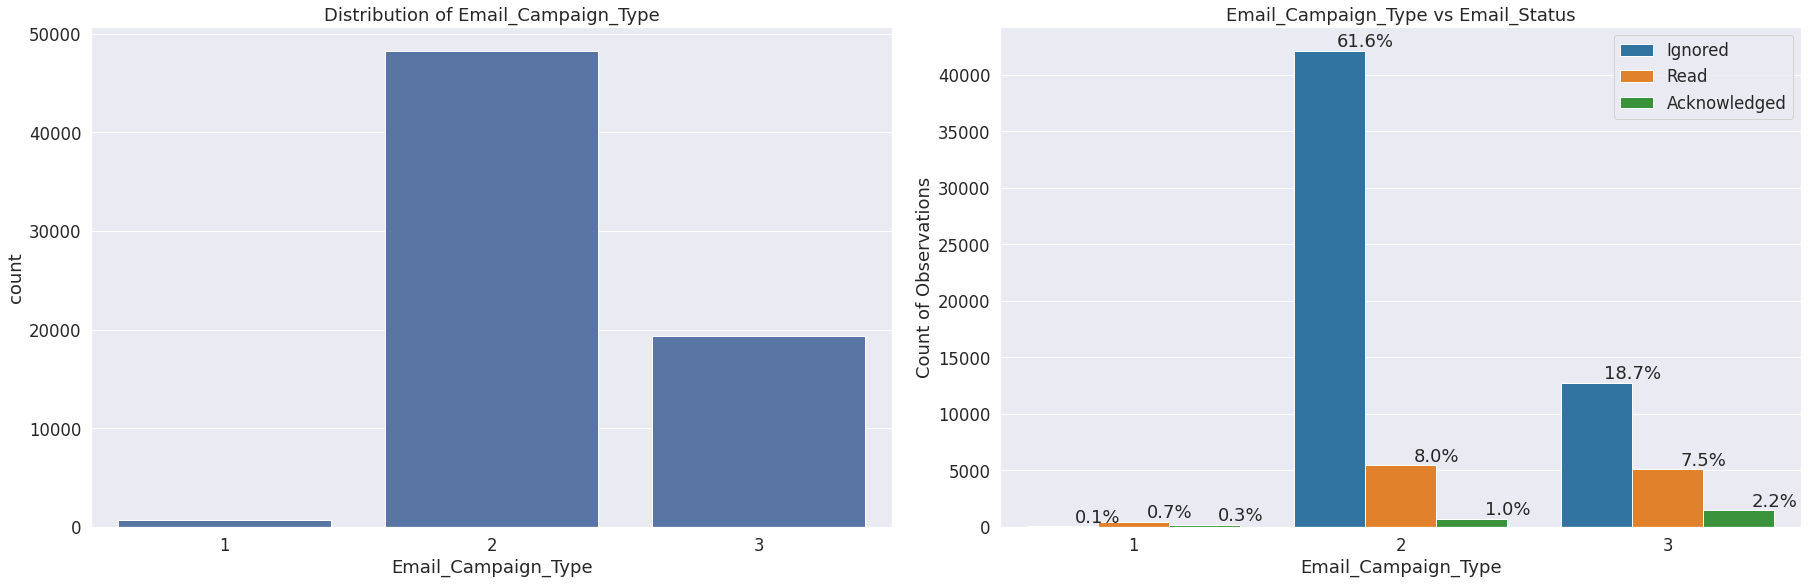

In [ ]:
catcountplot(df, 'Email_Campaign_Type', 'Email_Status', ['Ignored','Read', 'Acknowledged'], 1, 'tab10')

* Among the 3 different Email Campaign Types, type1 has been sent the least (close to 1%) 

* Email campaign type 2 seems to have been sent the most and more than 60% percent of the ignored mails come from this category.

<B>Email_Type vs Email_Status:

<Figure size 864x504 with 0 Axes>

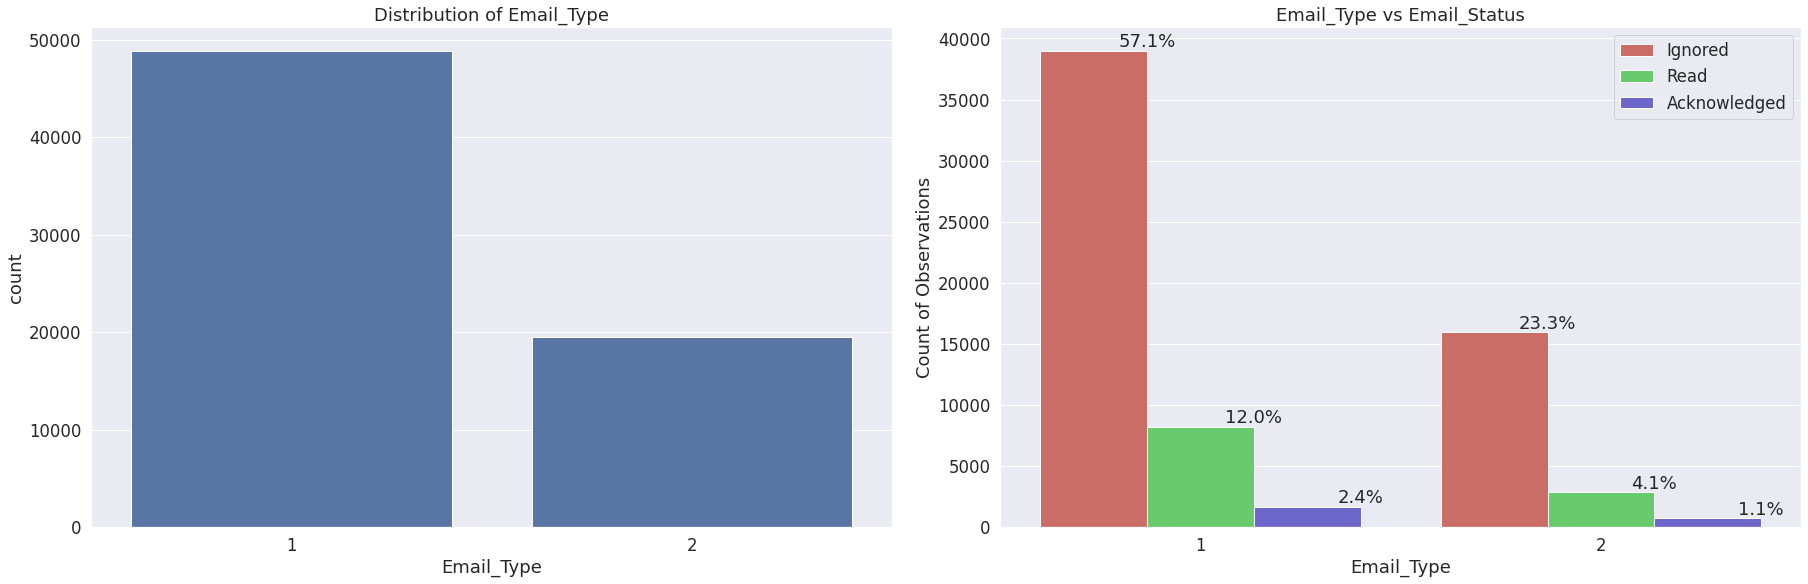

In [ ]:
catcountplot(df, 'Email_Type', 'Email_Status', ['Ignored','Read', 'Acknowledged'], 1)

There are two categories 1 and 2. We can think of them as marketing emails or important updates, notices like emails regarding the business. Email Type 1 was sent to more clients compared to Type 2.

<b>Time_Email_sent_Category vs Email_Status:

<Figure size 864x504 with 0 Axes>

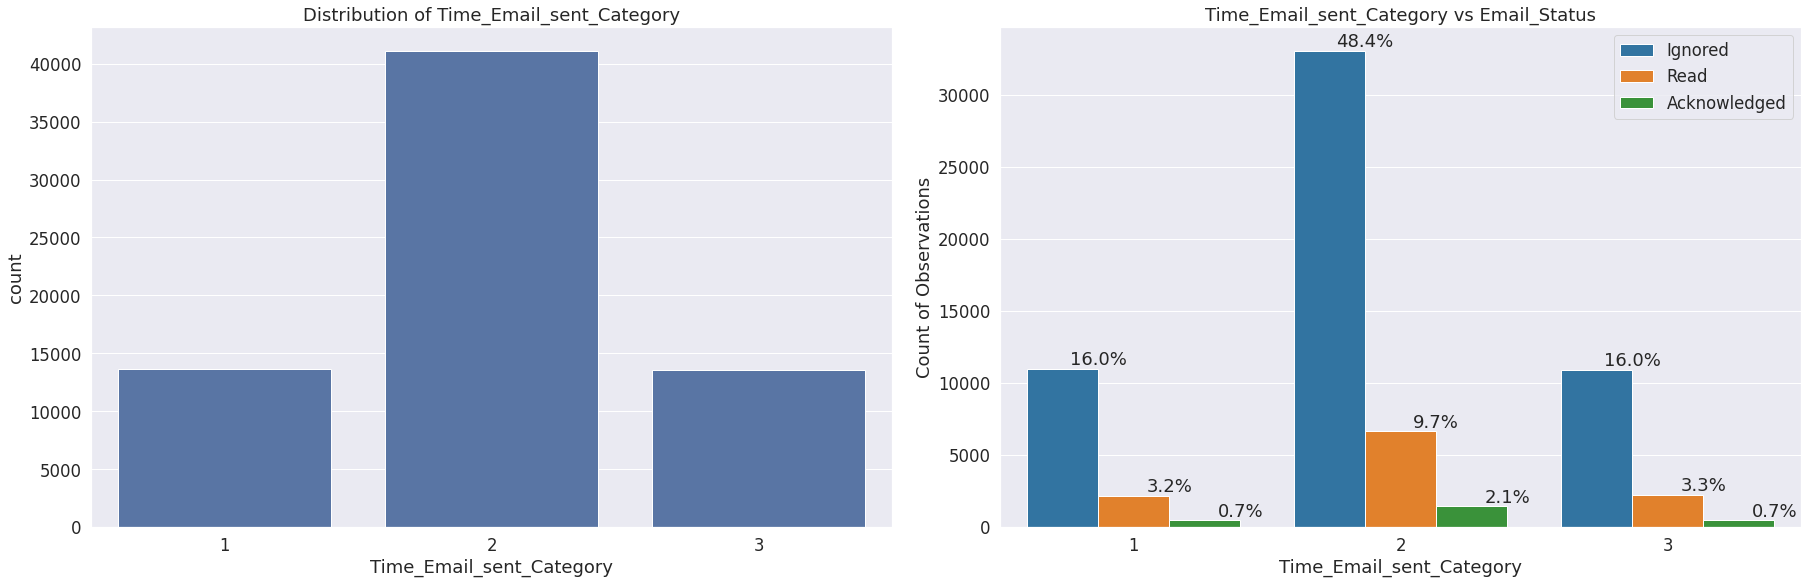

In [ ]:
catcountplot(df, 'Time_Email_sent_Category', 'Email_Status', ['Ignored','Read', 'Acknowledged'], 1, 'tab10')

Time_Email_sent_Category has three categories 1,2 and 3; the time of the day when the email was sent, we can think of it as morning, evening and night time slots.

* More people received emails during the evening.
* Though this feature does not seem to have much of an impact on the client's responce. 

### Analysis of Numerical Features:


In [ ]:
# numeric columns
num_cols = [i for i in df.describe().columns if i not in cat_cols and i != 'Email_Status']

In [ ]:
print(f'The numerical columns in the data are : {num_cols}')

The numerical columns in the data are : ['Subject_Hotness_Score', 'Total_Past_Communications', 'Word_Count', 'Total_Links', 'Total_Images']


Let's check the distributions, outlier presence in the data and also their relations with the dependent column

In [ ]:
def numdistplot(data, x_col, y_col, y_labels, color = 'hls'):

  '''Plots 3 plots - 
      1. Distribution plot of the independent continuous feature
      2. A boxplot for the feature
      3. Boxplot comparing features distribution for different target class labels'''

  # plt.figure(figsize=(12,7))
  # sns.color_palette("tab10")

  # Distribution of Independent column
  fig, ax = plt.subplots(1, 3, figsize=(25,8), constrained_layout=True)
  sns.distplot(data[x_col],color="b", ax=ax[0])
  ax[0].set_title(f"Distribution of {x_col}")
  
  # plt.figure(figsize=(12,7))
  sns.boxplot(x=data[x_col], ax=ax[1])
  ax[1].set_title(f"Boxplot for {x_col}")

  # Independent col based on Dependent col 
  sns.boxplot(x=data[y_col], y =data[x_col], data=pd.melt(data) , palette = color, ax=ax[2])
  ax[2].set_title(f"{x_col} vs {y_col}")
  # plt.ylabel("Count of Observations")
  plt.xlabel(f'Email_Status: {y_labels}')
  fig.show()

<b>Subject_Hotness_Score:

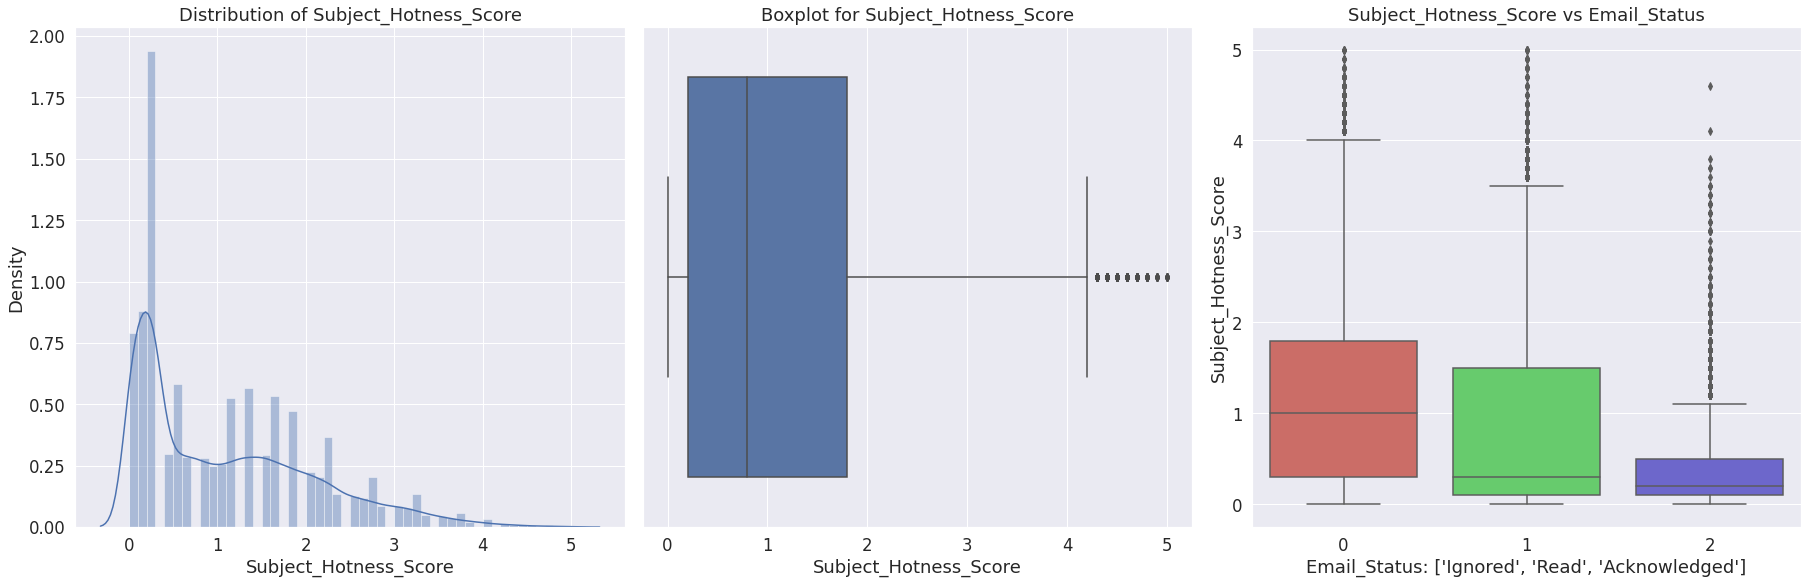

In [ ]:
numdistplot(df, 'Subject_Hotness_Score', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

 It is the email's subject's score on the basis of how good and effective the content is.

 * The feature is right skewed.
 * For all three class labels, it has outliers.

<b>Total_Past_Communications:

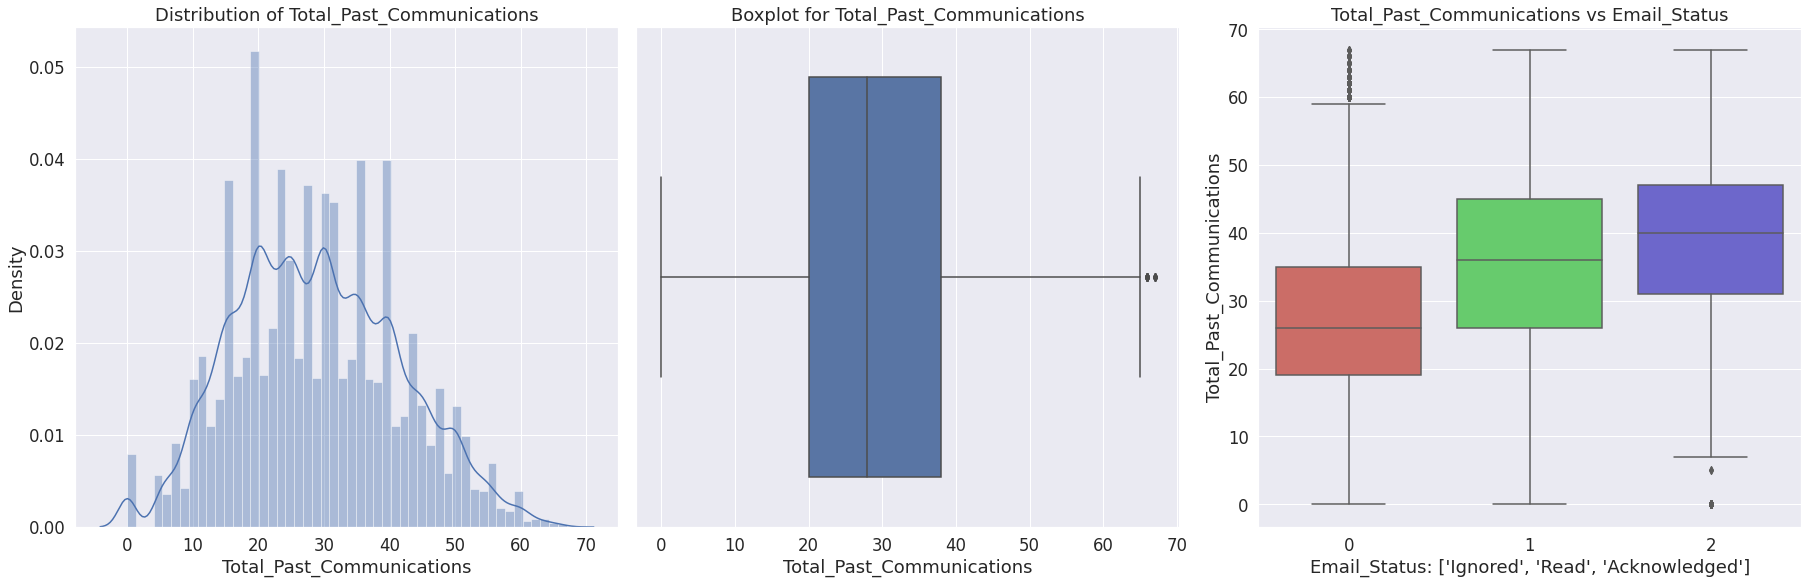

In [ ]:
numdistplot(df, 'Total_Past_Communications', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

This column contains the total previous mails from the same source, the number of communications had.

* The distribution is slightly positive skewed.
* From the boxplots, we can see that more acknowledgements were received from the clients who were previously contacted more.

<b>Word_Count:

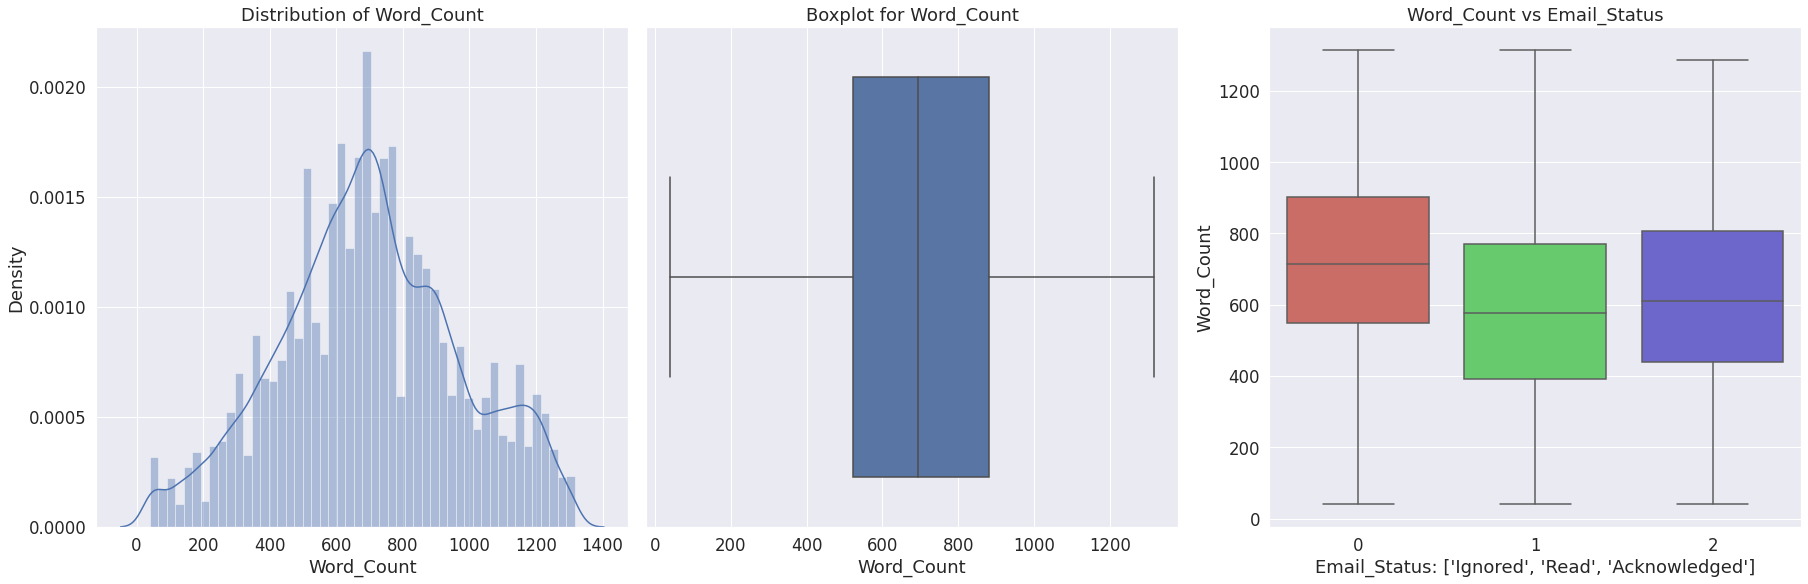

In [ ]:
numdistplot(df, 'Word_Count', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

The number of words contained in the email.
* Distribution for this feature follows more like a normal distribution.

<b>Total_Links:

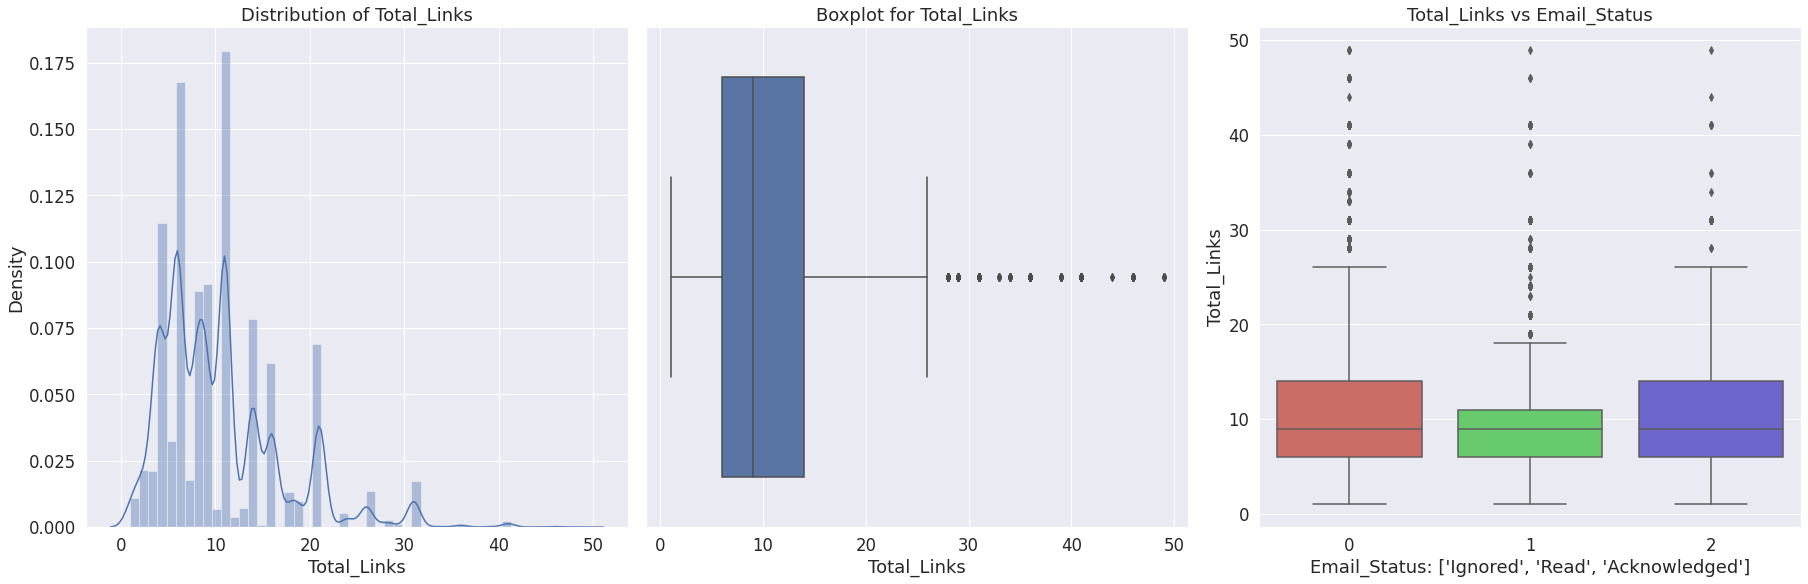

In [ ]:
numdistplot(df, 'Total_Links', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

Gives us the idea of how many links were there in the email.

* Positively skewed distribution.
* Contains outliers for all three class labels.

<b>Total_Images:

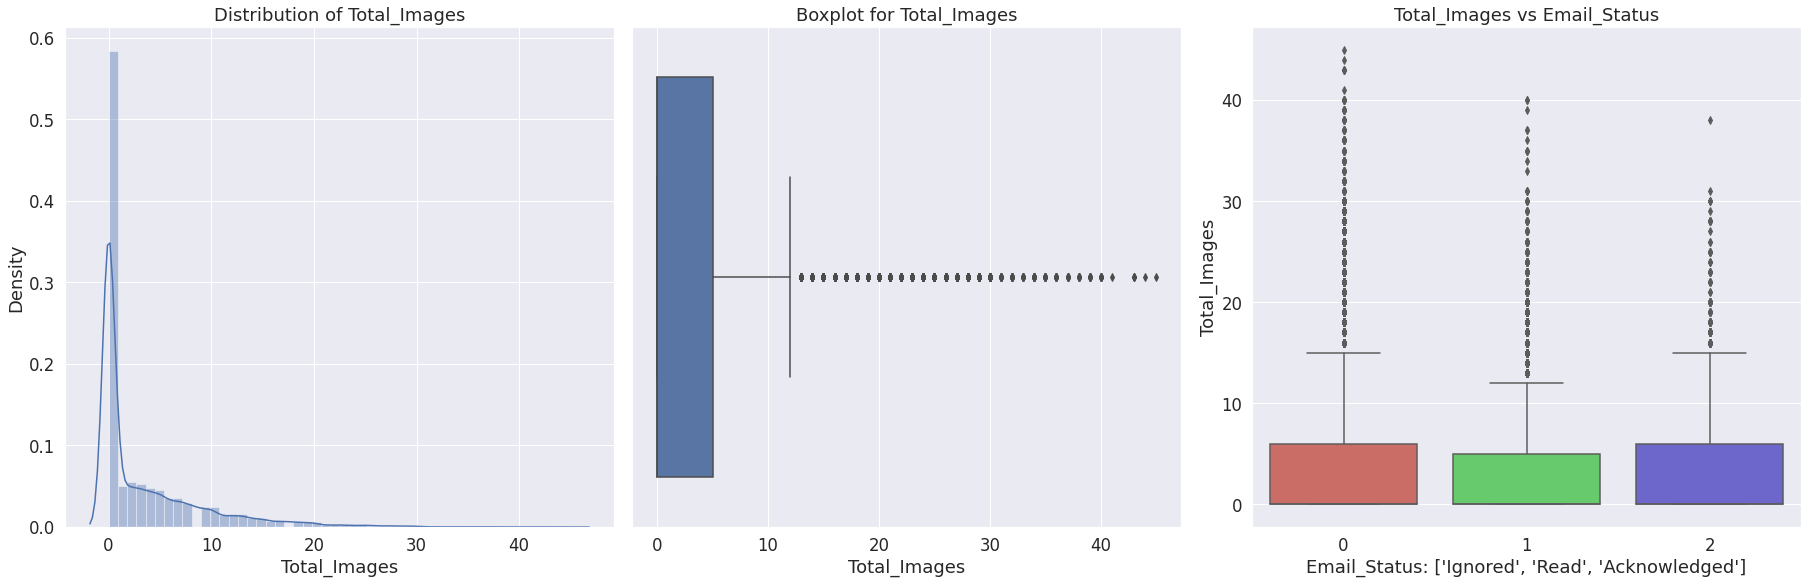

In [ ]:
numdistplot(df, 'Total_Images', 'Email_Status', ['Ignored','Read', 'Acknowledged'])

Number of images in the email.

* Highly skewed towards the positive side.
* Outliers present for all the target classes.

### Multicollinearity:

Multicollinearity occurs when a change in an independent variable impacts one or more independent variables.
Multicollinearity is a problem because it undermines the statistical significance of an independent variable.

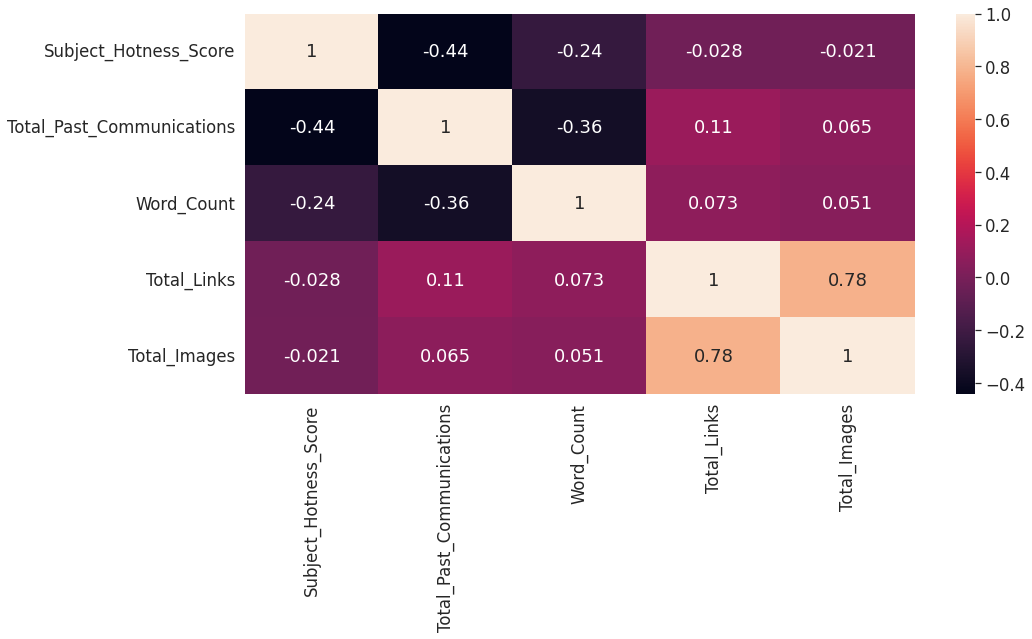

In [ ]:
# multicorrelation Heatmap
plt.figure(figsize=(15,7))
sns.heatmap(df[num_cols].corr(),annot=True)

We see some multicollinearity. Let's visualize them.

In [ ]:
def scat(dataframe, x_axis_col, y_axis_col, dependent_hue_col, color = 'tab10'):
  
  '''' Input: 1.Dataframe
              2.column in the x axis
              3.column in the y axis
              4.dependent var(hue)

      Output: plots 2 scatterplots '''

  # plt.rcParams.update({'figure.figsize':(8,5), 'figure.dpi':100})
  fig, ax = plt.subplots(1, 2, figsize=(20,7), constrained_layout=True)


  sns.scatterplot(x=x_axis_col, y=y_axis_col, data=df, ax = ax[0])
  ax[0].set_title(f'Scatterplot between {x_axis_col} & {y_axis_col}')
  sns.scatterplot(x=x_axis_col, y=y_axis_col, hue=dependent_hue_col, palette = color, data=dataframe, ax = ax[1])
  ax[1].set_title(f"{x_axis_col} vs {y_axis_col} w.r.t {dependent_hue_col}")

### **Top 3 most noticeable multicollinear columns:**

Scatterplot between **Total_links** & **Total_Images** and the correlation value is 0.78

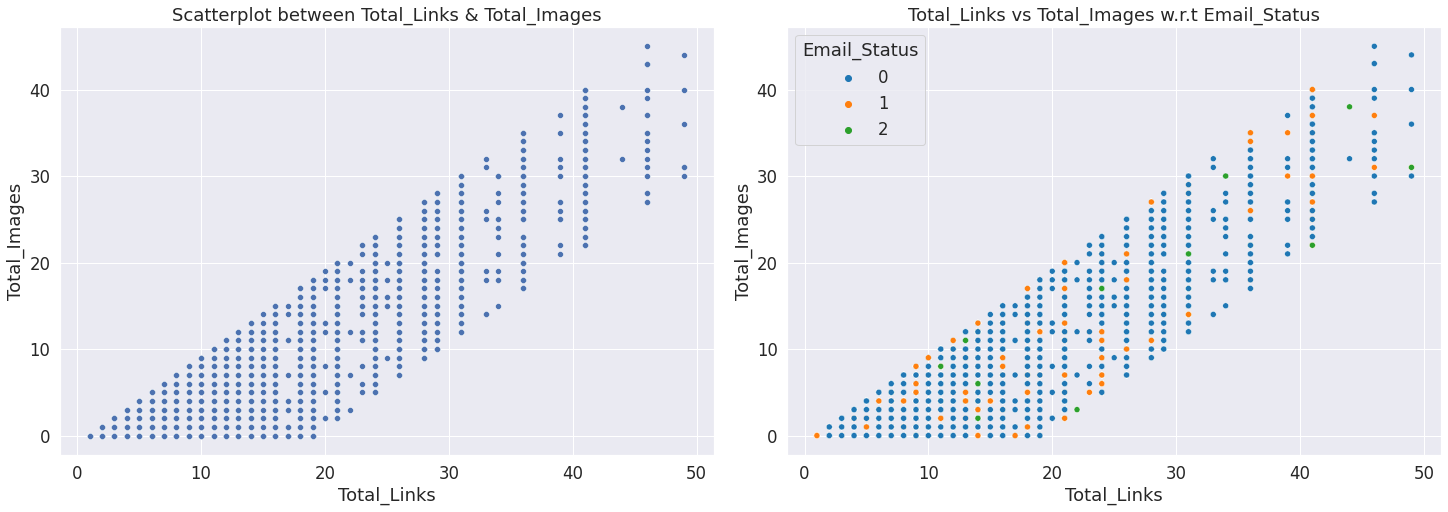

In [ ]:
scat(df, 'Total_Links', 'Total_Images', 'Email_Status')

Scatterplot between **Total_Past_Communications** & **Word_Count** and the correlation value is -0.36

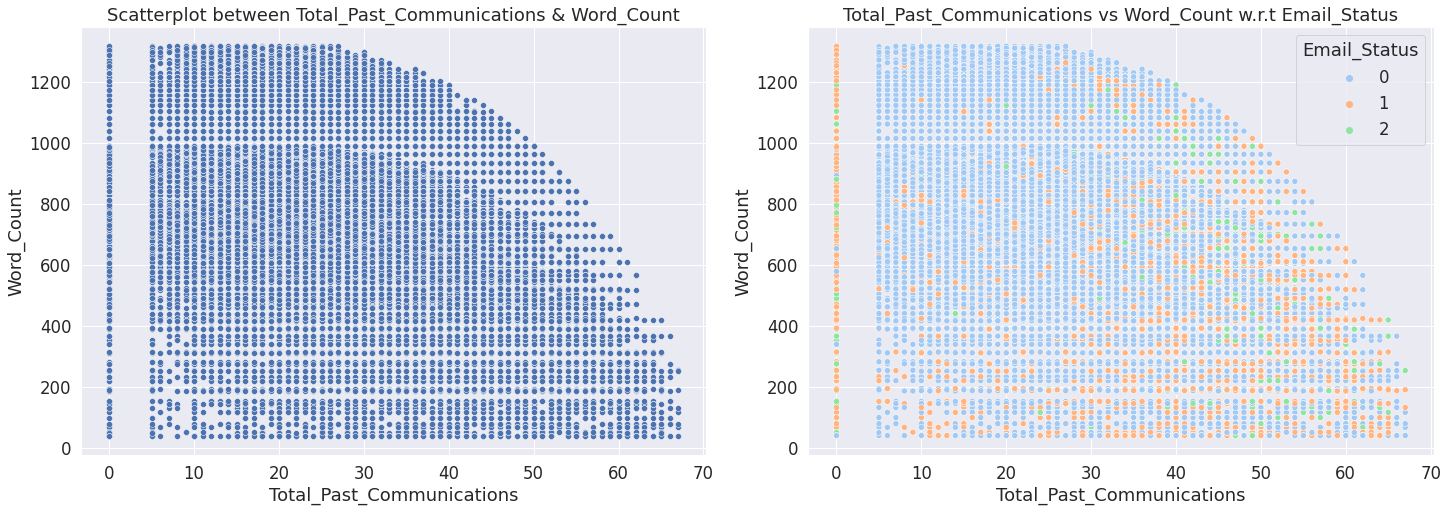

In [ ]:
scat(df, 'Total_Past_Communications', 'Word_Count', 'Email_Status', 'pastel')

Scatterplot between **Total_Past_Communications** & **Subject_Hotness_Score** and the correlation value is -0.44

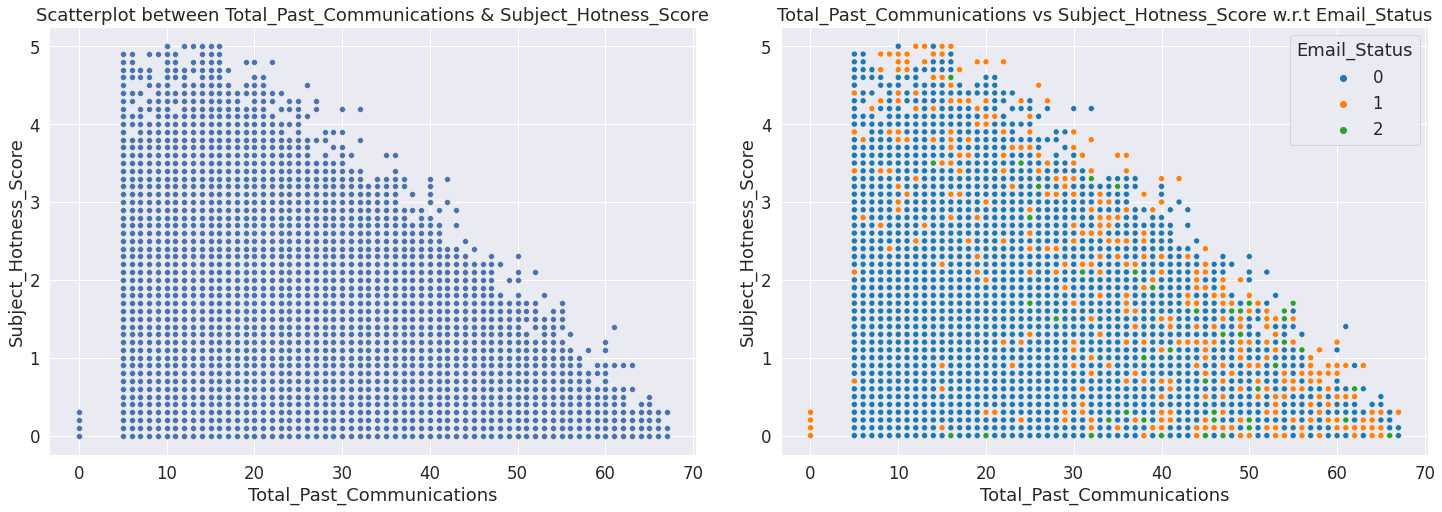

In [ ]:
scat(df, 'Total_Past_Communications', 'Subject_Hotness_Score', 'Email_Status')

## **Data Cleaning :**

Checking if One Email ID occured multiple times in the data or not

In [ ]:
df['Email_ID'].value_counts().sort_values(ascending = False).head()

EMA00081000034500    1
EMA00081000781390    1
EMA00081002583980    1
EMA00081002494510    1
EMA00081000066290    1
Name: Email_ID, dtype: int64

'Email_ID' column is not going to help us with anything. It's just unique identifier for each observation. So, we will drop this column

In [ ]:
df.drop('Email_ID', inplace = True, axis =1)

In [ ]:
df.head()

Email_Type  Subject_Hotness_Score  Email_Source_Type Customer_Location  \
0           1                    2.2                  2                 E   
1           2                    2.1                  1               NaN   
2           2                    0.1                  1                 B   
3           1                    3.0                  2                 E   
4           1                    0.0                  2                 C   

   Email_Campaign_Type  Total_Past_Communications  Time_Email_sent_Category  \
0                    2                       33.0                         1   
1                    2                       15.0                         2   
2                    3                       36.0                         2   
3                    2                       25.0                         2   
4                    3                       18.0                         2   

   Word_Count  Total_Links  Total_Images  Email_Status  
0         440          8.0           0.0             0  
1         504          5.0           0.0             0  
2         962          5.0           0.0             1  
3         610         16.0           0.0             0  
4         947          4.0           0.0             0

### Null Value treatment:

In [ ]:
df.isna().sum(), df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68353 entries, 0 to 68352
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Email_Type                 68353 non-null  int64  
 1   Subject_Hotness_Score      68353 non-null  float64
 2   Email_Source_Type          68353 non-null  int64  
 3   Customer_Location          56758 non-null  object 
 4   Email_Campaign_Type        68353 non-null  int64  
 5   Total_Past_Communications  61528 non-null  float64
 6   Time_Email_sent_Category   68353 non-null  int64  
 7   Word_Count                 68353 non-null  int64  
 8   Total_Links                66152 non-null  float64
 9   Total_Images               66676 non-null  float64
 10  Email_Status               68353 non-null  int64  
dtypes: float64(4), int64(6), object(1)
memory usage: 5.7+ MB


(Email_Type                       0
 Subject_Hotness_Score            0
 Email_Source_Type                0
 Customer_Location            11595
 Email_Campaign_Type              0
 Total_Past_Communications     6825
 Time_Email_sent_Category         0
 Word_Count                       0
 Total_Links                   2201
 Total_Images                  1677
 Email_Status                     0
 dtype: int64, None)

In 4 different columns, we have null values. The number of missing values are more than 1000 for each of these columns. We shall use machine learning imputation methods for these null values treatment.

'Customer_Location' column has the most number of missing values. And it being a categorical column, it is not easy to impute and we can not simply use mode imputation for this many large number of missing values.

Also, as we previously saw that this column is not really helpful for class prediction. So, instead of imputing this large number of null values , we should drop this column.

In [ ]:
#  dropping the 'Customer_Location' feature
df.drop('Customer_Location', inplace = True, axis = 1)

For the remaining columns, they are numeric and we can use Iterative Imputer for missing value imputataion. It would be better than doing simple mean or median imputation.

**Imputation using MICE:**

In [ ]:
from sklearn.experimental import enable_iterative_imputer  # noqa
# now you can import normally from sklearn.impute
from sklearn.impute import IterativeImputer

In [ ]:
imputer = IterativeImputer(initial_strategy = 'median', random_state=0)  # most of the variables with the missing values are skewed. So, using median for initial guess

# dropping the dependent column before imputation
no_null_df = df.copy()
no_null_df.drop('Email_Status', inplace =True, axis = 1)

# new dataframe after imputation
no_null_df.loc[:,:] = imputer.fit_transform(no_null_df)

In [ ]:
# rejoining the dependent var
no_null_df['Email_Status'] = df['Email_Status']

In [ ]:
# after imputation
no_null_df.isnull().sum()

Email_Type                   0
Subject_Hotness_Score        0
Email_Source_Type            0
Email_Campaign_Type          0
Total_Past_Communications    0
Time_Email_sent_Category     0
Word_Count                   0
Total_Links                  0
Total_Images                 0
Email_Status                 0
dtype: int64

GOOD... We do not have any more null values.

### Outlier Detections:

Calculating Inter-Quartile Range for numerical columns only

In [ ]:
Q1 = no_null_df[num_cols].quantile(0.25)
Q3 = no_null_df[num_cols].quantile(0.75)
IQR = Q3 - Q1

Number of outliers in the numeric features:

In [ ]:
print('Number of outlier observations considering only the numeric columns:')
print('\n')
((no_null_df < (Q1 - 1.5 * IQR)) | (no_null_df > (Q3 + 1.5 * IQR))).sum()  # any values outside the upper and lower bound

Number of outlier observations considering only the numeric columns:




Email_Campaign_Type             0
Email_Source_Type               0
Email_Status                    0
Email_Type                      0
Subject_Hotness_Score         247
Time_Email_sent_Category        0
Total_Images                 5659
Total_Links                  1651
Total_Past_Communications     136
Word_Count                      0
dtype: int64

Percentage of outliers in the numeric features:

In [ ]:
print('percentage of outlier observations considering only the numeric columns:')
print('\n')
round( (((no_null_df < (Q1 - 1.5 * IQR)) | (no_null_df > (Q3 + 1.5 * IQR))).sum() )*100 /no_null_df.shape[0], 2)

percentage of outlier observations considering only the numeric columns:




Email_Campaign_Type          0.00
Email_Source_Type            0.00
Email_Status                 0.00
Email_Type                   0.00
Subject_Hotness_Score        0.36
Time_Email_sent_Category     0.00
Total_Images                 8.28
Total_Links                  2.42
Total_Past_Communications    0.20
Word_Count                   0.00
dtype: float64

* Four out of five numeric columns have outliers. 
* 'Total_images' have 8.28 percent and 'Total_links' have 2.42 percent outliers. 'Subject_Hotness_Score' and 'Total_Past_Communications' have 0.36 and 0.20 percent outliers respectively.
* 'Word_Count' doesn't have any outliers.

During Visualization, we saw outliers were distributed through out the different class labels. But to be more precise, let's check the numbers.

In [ ]:
# df1 = no_null_df.copy()

In [ ]:
# num_cols = ['Total_Past_Communications']

In [ ]:
for i in num_cols:
  Q1 = no_null_df[i].quantile(0.25)
  Q3 = no_null_df[i].quantile(0.75)
  IQR = Q3 - Q1
  
  out = no_null_df[(no_null_df[i] > (Q3 + 1.5 * IQR)) | (no_null_df[i] < (Q1 - 1.5 * IQR))]
  # print(out)

  outliers = {0:0, 1:0, 2:0}
  outlier_dict = {}

  for j in out['Email_Status']:
    outliers[j] +=1

  outlier_dict[i] = outliers
  print(outlier_dict)

{'Subject_Hotness_Score': {0: 170, 1: 76, 2: 1}}
{'Total_Past_Communications': {0: 67, 1: 56, 2: 13}}
{'Word_Count': {0: 0, 1: 0, 2: 0}}
{'Total_Links': {0: 1412, 1: 186, 2: 53}}
{'Total_Images': {0: 4744, 1: 704, 2: 211}}


We can see that outliers are spread throughout different class labels. But our data is highly imbalanced and we can not drop outliers-observations for the minority class. 

What we can do is that we can drop the outliers from the majority class. That would solve our outlier problem upto some extent.

In [ ]:
for elem in num_cols:
  lower_bound = no_null_df[elem].quantile(0.01)
  upper_bound = no_null_df[elem].quantile(0.99)
  no_null_df = no_null_df.drop(no_null_df[(no_null_df[elem] > upper_bound) &  (no_null_df['Email_Status']==0)].index)
  no_null_df = no_null_df.drop(no_null_df[(no_null_df[elem] < lower_bound) & (no_null_df['Email_Status']==0)].index)

After dropping, the number of outliers for majority class label has decreased significantly.

In [ ]:
# checking
for i in num_cols:
  Q1 = no_null_df[i].quantile(0.25)
  Q3 = no_null_df[i].quantile(0.75)
  IQR = Q3 - Q1
  
  out = no_null_df[(no_null_df[i] > (Q3 + 1.5 * IQR)) | (no_null_df[i] < (Q1 - 1.5 * IQR))]
  # print(out)

  outliers = {0:0, 1:0, 2:0}
  outlier_dict = {}

  for j in out['Email_Status']:
    outliers[j] +=1

  outlier_dict[i] = outliers
  print(outlier_dict)

{'Subject_Hotness_Score': {0: 0, 1: 136, 2: 2}}
{'Total_Past_Communications': {0: 0, 1: 37, 2: 11}}
{'Word_Count': {0: 0, 1: 0, 2: 0}}
{'Total_Links': {0: 745, 1: 186, 2: 53}}
{'Total_Images': {0: 3912, 1: 704, 2: 211}}


In [ ]:
# new shape of the data
print(f'Shape of the data after outlier removal:  {no_null_df.shape}')

Shape of the data after outlier removal:  (65624, 10)


Distributions of class labels:

In [ ]:
# class label counts
no_null_df['Email_Status'].value_counts()

0    52212
1    11039
2     2373
Name: Email_Status, dtype: int64

## <b>Pre-Processing & Feature Engineering:

We previously saw that there are highly correlated numeric features. 'Total_Links' and 'Total_Images'. We can combine these two features to create a new feature and drop the original features.

In [ ]:
# creating a new column called Total_link_Lmages
no_null_df['Total_link_Images'] = no_null_df['Total_Links'] + no_null_df['Total_Images']

In [ ]:
# dropping the two original columns
no_null_df.drop('Total_Links', inplace= True, axis =1)
no_null_df.drop('Total_Images', inplace= True, axis =1)

In [ ]:
no_null_df

Email_Type  Subject_Hotness_Score  Email_Source_Type  \
0             1.0                    2.2                2.0   
1             2.0                    2.1                1.0   
2             2.0                    0.1                1.0   
3             1.0                    3.0                2.0   
4             1.0                    0.0                2.0   
...           ...                    ...                ...   
68348         2.0                    0.4                1.0   
68349         1.0                    1.3                1.0   
68350         1.0                    2.2                2.0   
68351         1.0                    0.4                1.0   
68352         1.0                    1.5                1.0   

       Email_Campaign_Type  Total_Past_Communications  \
0                      2.0                       33.0   
1                      2.0                       15.0   
2                      3.0                       36.0   
3                      2.0                       25.0   
4                      3.0                       18.0   
...                    ...                        ...   
68348                  2.0                       22.0   
68349                  2.0                       40.0   
68350                  2.0                       33.0   
68351                  2.0                       50.0   
68352                  2.0                       20.0   

       Time_Email_sent_Category  Word_Count  Email_Status  Total_link_Images  
0                           1.0       440.0             0                8.0  
1                           2.0       504.0             0                5.0  
2                           2.0       962.0             1                5.0  
3                           2.0       610.0             0               16.0  
4                           2.0       947.0             0                4.0  
...                         ...         ...           ...                ...  
68348                       3.0       737.0             0               29.0  
68349                       2.0       653.0             0               47.0  
68350                       2.0       490.0             0                9.0  
68351                       1.0       733.0             0               18.0  
68352                       2.0      1038.0             0                6.0  

[65624 rows x 9 columns]

Separating the features from the Target and storing the features in 'X' and the target in 'y'...

In [ ]:
X = no_null_df.drop('Email_Status', axis =1) # features
y = no_null_df['Email_Status'] # dependenht column

We need to do encoding for the categorical columns before we can use them in our models. Let's check the the categorical columns that we currently have- 

In [ ]:
cat_cols = []

for col in X.columns:
  if len(X[col].unique()) < 10: # any column with less than ten unique values
    cat_cols.append(col)

print(f'We have {len(cat_cols)} categorical columns in the Features, which are - {cat_cols}')

We have 4 categorical columns in the Features, which are - ['Email_Type', 'Email_Source_Type', 'Email_Campaign_Type', 'Time_Email_sent_Category']


In [ ]:
print('Unique values in the categorical features are -')
print('\n')
get_unique_values(X, cat_cols)

Unique values in the categorical features are -




{'Email_Type': [1.0, 2.0],
 'Email_Source_Type': [2.0, 1.0],
 'Email_Campaign_Type': [2.0, 3.0, 1.0],
 'Time_Email_sent_Category': [1.0, 2.0, 3.0]}

We can one hot encode these features. So, let's do that-

In [ ]:
# one hot encoding the features and droping the first instances
X = pd.get_dummies(X,columns=cat_cols, drop_first= True) 

In [ ]:
# features after encoding
X

Subject_Hotness_Score  Total_Past_Communications  Word_Count  \
0                        2.2                       33.0       440.0   
1                        2.1                       15.0       504.0   
2                        0.1                       36.0       962.0   
3                        3.0                       25.0       610.0   
4                        0.0                       18.0       947.0   
...                      ...                        ...         ...   
68348                    0.4                       22.0       737.0   
68349                    1.3                       40.0       653.0   
68350                    2.2                       33.0       490.0   
68351                    0.4                       50.0       733.0   
68352                    1.5                       20.0      1038.0   

       Total_link_Images  Email_Type_2.0  Email_Source_Type_2.0  \
0                    8.0               0                      1   
1                    5.0               1                      0   
2                    5.0               1                      0   
3                   16.0               0                      1   
4                    4.0               0                      1   
...                  ...             ...                    ...   
68348               29.0               1                      0   
68349               47.0               0                      0   
68350                9.0               0                      1   
68351               18.0               0                      0   
68352                6.0               0                      0   

       Email_Campaign_Type_2.0  Email_Campaign_Type_3.0  \
0                            1                        0   
1                            1                        0   
2                            0                        1   
3                            1                        0   
4                            0                        1   
...                        ...                      ...   
68348                        1                        0   
68349                        1                        0   
68350                        1                        0   
68351                        1                        0   
68352                        1                        0   

       Time_Email_sent_Category_2.0  Time_Email_sent_Category_3.0  
0                                 0                             0  
1                                 1                             0  
2                                 1                             0  
3                                 1                             0  
4                                 1                             0  
...                             ...                           ...  
68348                             0                             1  
68349                             1                             0  
68350                             1                             0  
68351                             0                             0  
68352                             1                             0  

[65624 rows x 10 columns]

### Train-Test split:

In [ ]:
# doing the train_test_split on our data
X_train, X_test, y_train, y_test = train_test_split( X, y , test_size = 0.2, random_state = 7, stratify=y) 


# scaling
scaler = MinMaxScaler()

# transform data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
X_train

Subject_Hotness_Score  Total_Past_Communications  Word_Count  \
54600                    2.2                  25.000000       146.0   
67234                    0.1                  10.000000       593.0   
32920                    1.1                  40.000000       605.0   
41731                    1.5                  12.000000      1216.0   
56160                    1.7                  45.000000       389.0   
...                      ...                        ...         ...   
22412                    1.1                   7.000000      1271.0   
32196                    0.2                   0.000000       565.0   
22766                    0.2                  50.000000       578.0   
61241                    0.3                  57.000000       282.0   
10937                    2.2                  19.090044       778.0   

       Total_link_Images  Email_Type_2.0  Email_Source_Type_2.0  \
54600           6.344997               0                      0   
67234           6.000000               1                      0   
32920          29.000000               0                      1   
41731           4.000000               1                      0   
56160           5.000000               0                      1   
...                  ...             ...                    ...   
22412          14.000000               0                      1   
32196           1.000000               1                      1   
22766          19.000000               0                      0   
61241           6.000000               1                      1   
10937           9.000000               0                      1   

       Email_Campaign_Type_2.0  Email_Campaign_Type_3.0  \
54600                        1                        0   
67234                        1                        0   
32920                        1                        0   
41731                        1                        0   
56160                        1                        0   
...                        ...                      ...   
22412                        1                        0   
32196                        0                        0   
22766                        0                        1   
61241                        0                        1   
10937                        1                        0   

       Time_Email_sent_Category_2.0  Time_Email_sent_Category_3.0  
54600                             0                             1  
67234                             1                             0  
32920                             1                             0  
41731                             0                             1  
56160                             1                             0  
...                             ...                           ...  
22412                             1                             0  
32196                             1                             0  
22766                             1                             0  
61241                             1                             0  
10937                             0                             0  

[52499 rows x 10 columns]

In [ ]:
X_train_scaled

array([[0.44      , 0.37313433, 0.0830721 , ..., 0.        , 0.        ,
        1.        ],
       [0.02      , 0.14925373, 0.43338558, ..., 0.        , 1.        ,
        0.        ],
       [0.22      , 0.59701493, 0.44278997, ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.04      , 0.74626866, 0.42163009, ..., 1.        , 1.        ,
        0.        ],
       [0.06      , 0.85074627, 0.18965517, ..., 1.        , 1.        ,
        0.        ],
       [0.44      , 0.28492603, 0.57836991, ..., 0.        , 0.        ,
        0.        ]])

### Handling Imbalance:

Since, we have imbalanced data, we can perform either undersampling  or oversampling to handle this problem. Let's try both and see the results...

### Undersampling:

In [ ]:
# undersampling X_train and y_train
X_train_under , y_train_under = nm.fit_resample(X_train_scaled, y_train)

In [ ]:
X_train_under.shape, y_train_under.shape

((5694, 10), (5694,))

In [ ]:
y_train_under.value_counts()

0    1898
1    1898
2    1898
Name: Email_Status, dtype: int64

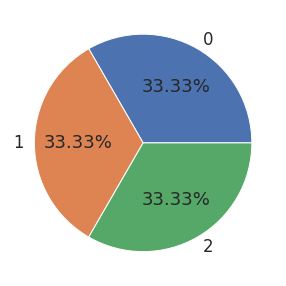

In [ ]:
# class labels distribution after undersampling
data = y_train_under.value_counts()
plt.figure(figsize=(10, 5))
plt.pie(data,autopct='%1.2f%%',labels=data.index)
plt.show()

### Oversampling with SMOTE:

SMOTE(synthetic Minority Oversampling Technique) works by randomly picking a point from the minority class and computing the k-nearest neighbors for this point. The synthetic points are added between the chosen point and its neighbors.

In [ ]:
# oversampling X_train and y_train with SMOTE
X_train_smote , y_train_smote = smote.fit_resample(X_train_scaled, y_train)

In [ ]:
# class labels after SMOTE
y_train_smote.value_counts()

0    41770
1    41770
2    41770
Name: Email_Status, dtype: int64

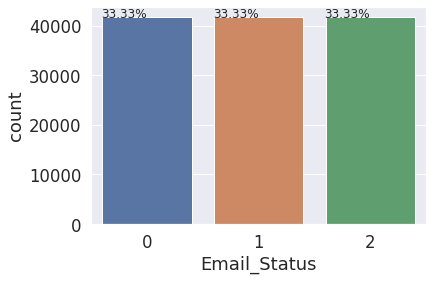

In [ ]:
#count plot for target variable
#visualizing our Oversampling
ax = sns.countplot(x=y_train_smote)
totals = []
for i in ax.patches:
    totals.append(i.get_height())

total = sum(totals)

for i in ax.patches:
    ax.text(i.get_x() - .01, i.get_height() + .5, \
          str(round((i.get_height()/total)*100, 2))+'%', fontsize=12)
plt.show()

## <b>Modelling:

Let's first create functions that will help us to evaluate the model performances. Then we shall be implementing models and check their results

In [ ]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Train_Accuracy', 'Train_Recall', 'Train_Precision', 'Train_F1score', 'Train_AUC' ,'Test_Accuracy', 'Test_Recall', 'Test_Precision', 'Test_F1score', 'Test_AUC']

In [ ]:
#Function to evaluate the model for multiclass classification

def model_evaluation(model_name_US,model_name_SMOTE,model_var_us, model_var_smote, x_train_us, y_train_us, x_train_smote, y_train_smote, X_test, y_test):
  ''' This function predicts and evaluates various models for clasification for Undersampling and SMOTE algorithms, visualizes results 
      and creates a dataframe that compares the various models.'''
  
  #Making predictions for undersampling
  y_pred_us_train = model_var_us.predict(x_train_us)
  y_pred_us_test = model_var_us.predict(X_test)
  #probs
  train_us_proba = model_var_us.predict_proba(x_train_us)
  test_us_proba = model_var_us.predict_proba(X_test)

  #Making predictions smote
  y_pred_smote_train = model_var_smote.predict(x_train_smote)
  y_pred_smote_test = model_var_smote.predict(X_test)
  #probs
  train_sm_proba = model_var_smote.predict_proba(x_train_smote)
  test_sm_proba = model_var_smote.predict_proba(X_test)

  #Evaluation 
  #Accuracy Undersampling
  accuracy_us_train = accuracy_score(y_train_us,y_pred_us_train)
  accuracy_us_test = accuracy_score(y_test,y_pred_us_test)
  #Accuracy SMOTE
  accuracy_smote_train = accuracy_score(y_train_smote,y_pred_smote_train)
  accuracy_smote_test = accuracy_score(y_test,y_pred_smote_test)

  #Confusion Matrix Undersamplin
  cm_us_train = confusion_matrix(y_train_us,y_pred_us_train)
  cm_us_test = confusion_matrix(y_test,y_pred_us_test)
  #Confusion Matrix SMOTE
  cm_smote_train = confusion_matrix(y_train_smote,y_pred_smote_train)
  cm_smote_test = confusion_matrix(y_test,y_pred_smote_test)

  #Recall Undersampling
  train_recall_us = recall_score(y_train_us,y_pred_us_train, average='weighted')
  test_recall_us = recall_score(y_test,y_pred_us_test, average='weighted')
  #Recall SMOTE
  train_recall_smote = recall_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_recall_smote = recall_score(y_test,y_pred_smote_test, average='weighted')

  #Precision Undersampling
  train_precision_us = precision_score(y_train_us,y_pred_us_train, average='weighted')
  test_precision_us = precision_score(y_test,y_pred_us_test, average='weighted')
  #Precision SMOTE
  train_precision_smote = precision_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_precision_smote = precision_score(y_test,y_pred_smote_test, average='weighted')

  #F1 Score Undersampling
  train_f1_us = f1_score(y_train_us,y_pred_us_train, average='weighted')
  test_f1_us = f1_score(y_test,y_pred_us_test, average='weighted')
  #F1 Score SMOTE
  train_f1_smote = f1_score(y_train_smote,y_pred_smote_train, average='weighted')
  test_f1_smote = f1_score(y_test,y_pred_smote_test, average='weighted')

  #ROC-AUC Undersampling
  train_auc_us = roc_auc_score(y_train_us,train_us_proba,average='weighted',multi_class = 'ovr')
  test_auc_us = roc_auc_score(y_test,test_us_proba,average='weighted',multi_class = 'ovr')
  #ROC-AUC SMOTE
  train_auc_smote = roc_auc_score(y_train_smote,train_sm_proba,average='weighted',multi_class = 'ovr')
  test_auc_smote = roc_auc_score(y_test,test_sm_proba,average='weighted',multi_class = 'ovr')

  #Visualising Results Undersampling
  print("----- Evaluation on Random Undersampled data -----" + str(model_name_US) + "------")
  print("--------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_us_test)
  print(classification_report(y_test,y_pred_us_test))

  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_us_proba[:,i], pos_label=i)
  plt.figure(figsize=(12,7))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Others') #+"AUC="+str(test_auc_us))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Others') #+"AUC="+str(test_auc_us))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Others') #+"AUC="+str(test_auc_us))
  plt.title('Multiclass ROC curve of ' + str(model_name_US))
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()




  #Visualising Results SMOTE
  print("----- Evaluation on SMOTE data -------" + str(model_name_SMOTE) + '-----')
  print("---------------Test data ---------------\n")
  print("Confusion matrix \n")
  print(cm_smote_test)
  print(classification_report(y_test,y_pred_smote_test))

 
  #create ROC curve
  fpr = {}
  tpr = {}
  thresh ={}
  no_of_class=3
  for i in range(no_of_class):    
      fpr[i], tpr[i], thresh[i] = metrics.roc_curve(y_test, test_sm_proba[:,i], pos_label=i)
  plt.figure(figsize=(12,7))
  plt.plot(fpr[0], tpr[0], linestyle='--',color='blue', label='Class 0 vs Rest') #+" AUC="+str(test_auc_smote))
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest') #+" AUC="+str(test_auc_smote))
  plt.plot(fpr[2], tpr[2], linestyle='--',color='orange', label='Class 2 vs Rest') #+" AUC="+str(test_auc_smote))
  plt.title('Multiclass ROC curve of '+ str(model_name_SMOTE) + 'for Test data')
  plt.ylabel('True Positive Rate')
  plt.xlabel('False Positive Rate')
  plt.legend(loc=4)
  plt.show()

  #Saving our results
  global comparison_columns
  metric_scores_us = [model_name_US,accuracy_us_train,train_recall_us,train_precision_us,train_f1_us,train_auc_us,accuracy_us_test,test_recall_us,test_precision_us,test_f1_us,test_auc_us]
  final_dict_us = dict(zip(comparison_columns,metric_scores_us))

  metric_scores_smote = [model_name_SMOTE,accuracy_smote_train,train_recall_smote,train_precision_smote,train_f1_smote,train_auc_smote,accuracy_smote_test,test_recall_smote,test_precision_smote,test_f1_smote,test_auc_smote]
  final_dict_smote = dict(zip(comparison_columns,metric_scores_smote))

  dict_list = [final_dict_us, final_dict_smote]
  return dict_list

In [ ]:
#function to create the comparison table
final_list = []
def add_list_to_final_df(dict_list):
  '''To add new model results with the previous models' results'''
  
  global final_list
  for elem in dict_list:
    final_list.append(elem)
  global comparison_df
  comparison_df = pd.DataFrame(final_list, columns= comparison_columns)

### Model Training:
----


### **Logistic Regression:**

Logistic Regression is a classification algorithm that predicts the binary outcome of an event. It works by calculating the probability for such outcomes.
Multinomial logistic regression is an extension of logistic regression that adds native support for multi-class classification problems.

***Logistic Regression with Undersampling***

In [ ]:
from pandas.core.common import random_state
# creating instances for different models
logistic_under = LogisticRegression(fit_intercept=True, max_iter=1000, random_state = 7, class_weight='balanced',multi_class='multinomial', solver='lbfgs')

In [ ]:
logistic_under.fit(X_train_under, y_train_under)
y_pred = logistic_under.predict(X_test_scaled)

***Logistic Regression with Oversampling***

In [ ]:
logistic_smote = LogisticRegression(fit_intercept=True, max_iter=1000, random_state = 7, class_weight='balanced',multi_class='multinomial', solver='lbfgs')

In [ ]:
logistic_smote.fit(X_train_smote, y_train_smote)
y_pred = logistic_smote.predict(X_test_scaled)

----- Evaluation on Random Undersampled data -----Logistic_Reg UnderSampling------
--------------Test data ---------------

Confusion matrix 

[[3581  288 6573]
 [ 574  327 1307]
 [ 105  104  266]]
              precision    recall  f1-score   support

           0       0.84      0.34      0.49     10442
           1       0.45      0.15      0.22      2208
           2       0.03      0.56      0.06       475

    accuracy                           0.32     13125
   macro avg       0.44      0.35      0.26     13125
weighted avg       0.75      0.32      0.43     13125



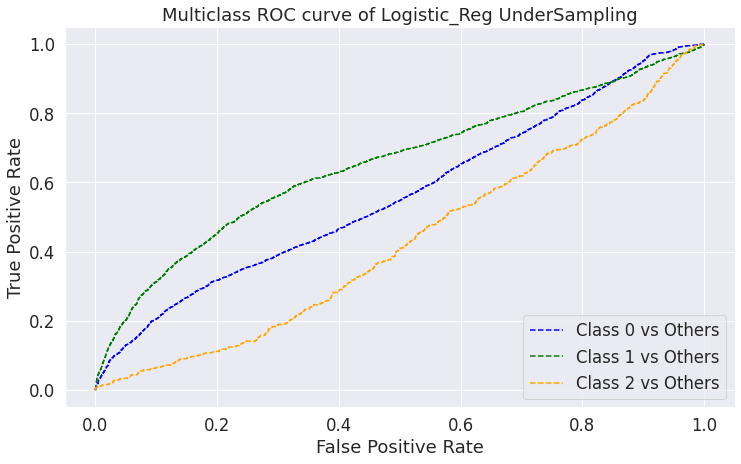

----- Evaluation on SMOTE data -------Logistic_Reg SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[7423 1377 1642]
 [ 681  521 1006]
 [ 103   60  312]]
              precision    recall  f1-score   support

           0       0.90      0.71      0.80     10442
           1       0.27      0.24      0.25      2208
           2       0.11      0.66      0.18       475

    accuracy                           0.63     13125
   macro avg       0.43      0.53      0.41     13125
weighted avg       0.77      0.63      0.68     13125



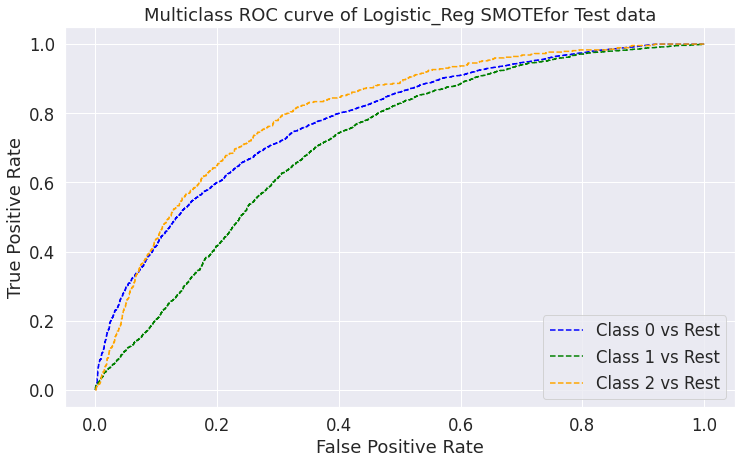

[{'Model_Name': 'Logistic_Reg UnderSampling',
  'Train_Accuracy': 0.49402880224798035,
  'Train_Recall': 0.49402880224798035,
  'Train_Precision': 0.49287880093047504,
  'Train_F1score': 0.4913451646460699,
  'Train_AUC': 0.6945033557220863,
  'Test_Accuracy': 0.31801904761904765,
  'Test_Recall': 0.31801904761904765,
  'Test_Precision': 0.746465405456256,
  'Test_F1score': 0.4273847576206975,
  'Test_AUC': 0.5738376158304311},
 {'Model_Name': 'Logistic_Reg SMOTE',
  'Train_Accuracy': 0.5432367728034474,
  'Train_Recall': 0.5432367728034474,
  'Train_Precision': 0.5279250978256446,
  'Train_F1score': 0.5173149314090816,
  'Train_AUC': 0.7247171540316191,
  'Test_Accuracy': 0.6290285714285714,
  'Test_Recall': 0.6290285714285714,
  'Test_Precision': 0.7681587797870237,
  'Test_F1score': 0.6819936658448702,
  'Test_AUC': 0.7698023189512232}]

In [ ]:
#Let's evaluate logistic reg
logistic_reg_list = model_evaluation('Logistic_Reg UnderSampling','Logistic_Reg SMOTE',logistic_under, logistic_smote, X_train_under, y_train_under, X_train_smote, y_train_smote, X_test_scaled, y_test)
logistic_reg_list

In [ ]:
#adding result to final list
add_list_to_final_df(logistic_reg_list)

In [ ]:
# comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0  Logistic_Reg UnderSampling        0.494029      0.494029         0.492879   
1          Logistic_Reg SMOTE        0.543237      0.543237         0.527925   

   Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0       0.491345   0.694503       0.318019     0.318019        0.746465   
1       0.517315   0.724717       0.629029     0.629029        0.768159   

   Test_F1score  Test_AUC  
0      0.427385  0.573838  
1      0.681994  0.769802

### **Decision Tree Classifier**

Decision Tree is a non-parametric algorithm that uses the concept of information gain to do recursive partitioning. It can be used for both regression and classification.

In [ ]:
#Classifier with undersampling
dt_us = DecisionTreeClassifier(max_leaf_nodes=200, random_state=7)
dt_us.fit(X_train_under,y_train_under)

DecisionTreeClassifier(max_leaf_nodes=200, random_state=7)

In [ ]:
#Classifier with SMOTE
dt_smote = DecisionTreeClassifier(max_leaf_nodes=200, random_state=7)
dt_smote.fit(X_train_smote,y_train_smote)

DecisionTreeClassifier(max_leaf_nodes=200, random_state=7)

----- Evaluation on Random Undersampled data -----Decision Tree UnderSampling------
--------------Test data ---------------

Confusion matrix 

[[1381  653 8408]
 [ 409  465 1334]
 [  98  148  229]]
              precision    recall  f1-score   support

           0       0.73      0.13      0.22     10442
           1       0.37      0.21      0.27      2208
           2       0.02      0.48      0.04       475

    accuracy                           0.16     13125
   macro avg       0.37      0.27      0.18     13125
weighted avg       0.64      0.16      0.22     13125



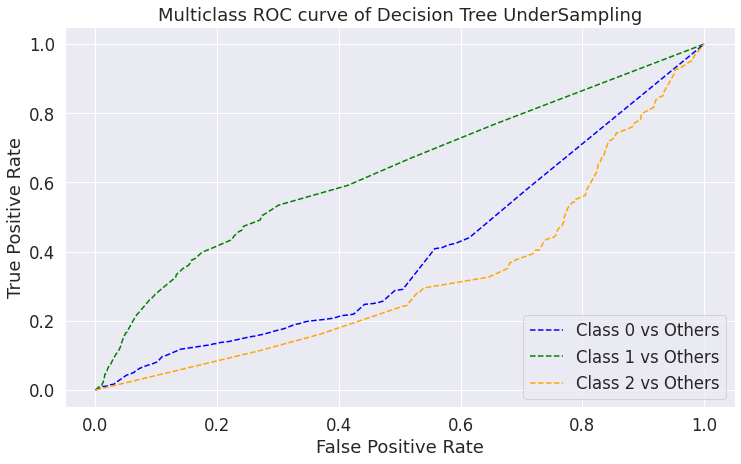

----- Evaluation on SMOTE data -------Decision Tree SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8069 1263 1110]
 [ 947  599  662]
 [ 147  137  191]]
              precision    recall  f1-score   support

           0       0.88      0.77      0.82     10442
           1       0.30      0.27      0.28      2208
           2       0.10      0.40      0.16       475

    accuracy                           0.67     13125
   macro avg       0.43      0.48      0.42     13125
weighted avg       0.75      0.67      0.71     13125



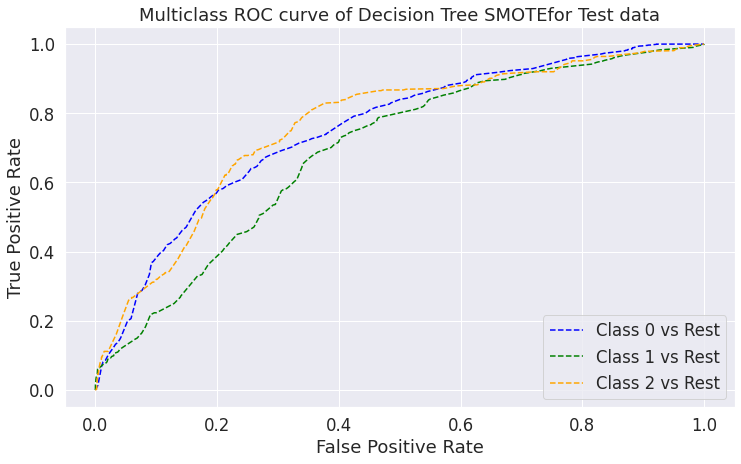

[{'Model_Name': 'Decision Tree UnderSampling',
  'Train_Accuracy': 0.6159114857744995,
  'Train_Recall': 0.6159114857744995,
  'Train_Precision': 0.6453149186683788,
  'Train_F1score': 0.6178605954409461,
  'Train_AUC': 0.8010768642273327,
  'Test_Accuracy': 0.1580952380952381,
  'Test_Recall': 0.1580952380952381,
  'Test_Precision': 0.6445584141177096,
  'Test_F1score': 0.22483733231664083,
  'Test_AUC': 0.4338615575124574},
 {'Model_Name': 'Decision Tree SMOTE',
  'Train_Accuracy': 0.6330859468518075,
  'Train_Recall': 0.6330859468518076,
  'Train_Precision': 0.6261598748771466,
  'Train_F1score': 0.6205794086701734,
  'Train_AUC': 0.8100970041507977,
  'Test_Accuracy': 0.6749714285714286,
  'Test_Recall': 0.6749714285714286,
  'Test_Precision': 0.7545249843560801,
  'Test_F1score': 0.7084642037171232,
  'Test_AUC': 0.743193013212171}]

In [ ]:
dt_eval_list = model_evaluation('Decision Tree UnderSampling', 'Decision Tree SMOTE', dt_us, dt_smote, X_train_under, y_train_under, X_train_smote, y_train_smote, X_test_scaled, y_test)
dt_eval_list

In [ ]:
#adding list
add_list_to_final_df(dt_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0   Logistic_Reg UnderSampling        0.494029      0.494029         0.492879   
1           Logistic_Reg SMOTE        0.543237      0.543237         0.527925   
2  Decision Tree UnderSampling        0.615911      0.615911         0.645315   
3          Decision Tree SMOTE        0.633086      0.633086         0.626160   

   Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0       0.491345   0.694503       0.318019     0.318019        0.746465   
1       0.517315   0.724717       0.629029     0.629029        0.768159   
2       0.617861   0.801077       0.158095     0.158095        0.644558   
3       0.620579   0.810097       0.674971     0.674971        0.754525   

   Test_F1score  Test_AUC  
0      0.427385  0.573838  
1      0.681994  0.769802  
2      0.224837  0.433862  
3      0.708464  0.743193

### **SGD Classifier:**

The SGDClassifier applies regularized linear model with SGD learning to build an estimator. The SGD classifier can work well with large-scale datasets and it is an efficient and easy to implement method.

In [ ]:
# undersampling with svm
sgd_us = SGDClassifier(random_state= 7 , loss= 'modified_huber')
sgd_us.fit(X_train_under,y_train_under)

SGDClassifier(loss='modified_huber', random_state=7)

In [ ]:
# oversampling with svm
sgd_smote = SGDClassifier(random_state= 7, loss= 'modified_huber')
sgd_smote.fit(X_train_smote,y_train_smote)

SGDClassifier(loss='modified_huber', random_state=7)

----- Evaluation on Random Undersampled data -----SGD Classifier UnderSampling------
--------------Test data ---------------

Confusion matrix 

[[3583  459 6400]
 [ 550  325 1333]
 [  84   85  306]]
              precision    recall  f1-score   support

           0       0.85      0.34      0.49     10442
           1       0.37      0.15      0.21      2208
           2       0.04      0.64      0.07       475

    accuracy                           0.32     13125
   macro avg       0.42      0.38      0.26     13125
weighted avg       0.74      0.32      0.43     13125



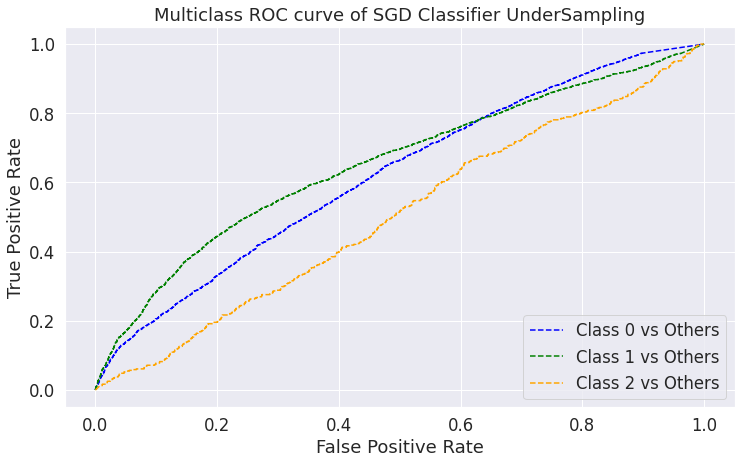

----- Evaluation on SMOTE data -------SGD Classifier SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8459  445 1538]
 [ 979  230  999]
 [ 149   19  307]]
              precision    recall  f1-score   support

           0       0.88      0.81      0.84     10442
           1       0.33      0.10      0.16      2208
           2       0.11      0.65      0.18       475

    accuracy                           0.69     13125
   macro avg       0.44      0.52      0.40     13125
weighted avg       0.76      0.69      0.71     13125



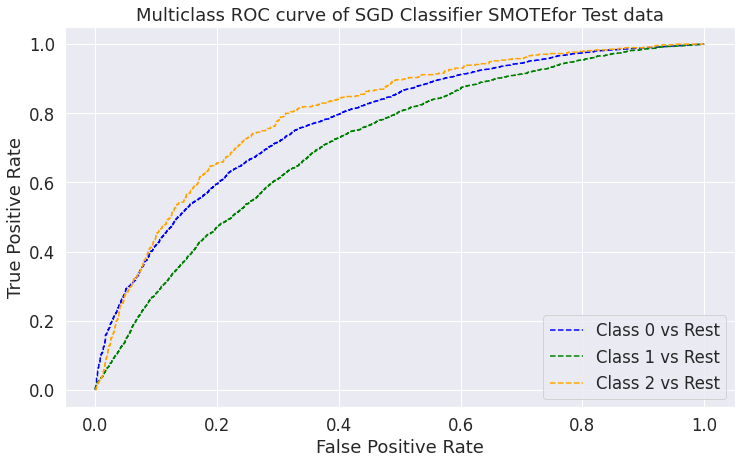

[{'Model_Name': 'SGD Classifier UnderSampling',
  'Train_Accuracy': 0.46540217773094483,
  'Train_Recall': 0.46540217773094483,
  'Train_Precision': 0.4622243308637021,
  'Train_F1score': 0.4612393154234066,
  'Train_AUC': 0.6643040776844203,
  'Test_Accuracy': 0.32106666666666667,
  'Test_Recall': 0.32106666666666667,
  'Test_Precision': 0.7402641461705257,
  'Test_F1score': 0.4270557451167474,
  'Test_AUC': 0.6227493938606262},
 {'Model_Name': 'SGD Classifier SMOTE',
  'Train_Accuracy': 0.5346101667863699,
  'Train_Recall': 0.5346101667863699,
  'Train_Precision': 0.5266801129811353,
  'Train_F1score': 0.47182996313456105,
  'Train_AUC': 0.7203932718966133,
  'Test_Accuracy': 0.6854095238095238,
  'Test_Recall': 0.6854095238095238,
  'Test_Precision': 0.7616330522551962,
  'Test_F1score': 0.7053687328318266,
  'Test_AUC': 0.7687497221884116}]

In [ ]:
sgd_eval_list = model_evaluation('SGD Classifier UnderSampling', 'SGD Classifier SMOTE', sgd_us, sgd_smote, X_train_under, y_train_under, X_train_smote, y_train_smote, X_test_scaled, y_test)
sgd_eval_list

In [ ]:
# #adding list
add_list_to_final_df(sgd_eval_list)
# #Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  \
0    Logistic_Reg UnderSampling        0.494029      0.494029   
1            Logistic_Reg SMOTE        0.543237      0.543237   
2   Decision Tree UnderSampling        0.615911      0.615911   
3           Decision Tree SMOTE        0.633086      0.633086   
4   Random Forest UnderSampling        0.541096      0.541096   
5           Random Forest SMOTE        0.569699      0.569699   
6  SGD Classifier UnderSampling        0.465402      0.465402   
7          SGD Classifier SMOTE        0.534610      0.534610   

   Train_Precision  Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  \
0         0.492879       0.491345   0.694503       0.318019     0.318019   
1         0.527925       0.517315   0.724717       0.629029     0.629029   
2         0.645315       0.617861   0.801077       0.158095     0.158095   
3         0.626160       0.620579   0.810097       0.674971     0.674971   
4         0.559169       0.535871   0.728396       0.157714     0.157714   
5         0.555404       0.547896   0.758429       0.675886     0.675886   
6         0.462224       0.461239   0.664304       0.321067     0.321067   
7         0.526680       0.471830   0.720393       0.685410     0.685410   

   Test_Precision  Test_F1score  Test_AUC  
0        0.746465      0.427385  0.573838  
1        0.768159      0.681994  0.769802  
2        0.644558      0.224837  0.433862  
3        0.754525      0.708464  0.743193  
4        0.647024      0.227999  0.449464  
5        0.771665      0.714124  0.769600  
6        0.740264      0.427056  0.622749  
7        0.761633      0.705369  0.768750

### **Random Forest Classifier:**

This is an ensemble learning algorithm that uses Decision Trees as base models and finally merges those base estimators to make the final prediction. If a single decision tree overfits, then using Random forest can help to reduce the overfitting problem.

In [ ]:
# random forest with undersampling
rf_us = RandomForestClassifier(n_estimators = 200,  max_depth = 5, random_state=7, oob_score = True)
rf_us.fit(X_train_under,y_train_under)

RandomForestClassifier(max_depth=5, n_estimators=200, oob_score=True,
                       random_state=7)

In [ ]:
# random forest with SMOTE
rf_smote = RandomForestClassifier(n_estimators = 200,  max_depth = 5, random_state=7, oob_score = True)
rf_smote.fit(X_train_smote,y_train_smote)

RandomForestClassifier(max_depth=5, n_estimators=200, oob_score=True,
                       random_state=7)

----- Evaluation on Random Undersampled data -----Random Forest UnderSampling------
--------------Test data ---------------

Confusion matrix 

[[1490  282 8670]
 [ 481  320 1407]
 [ 108  107  260]]
              precision    recall  f1-score   support

           0       0.72      0.14      0.24     10442
           1       0.45      0.14      0.22      2208
           2       0.03      0.55      0.05       475

    accuracy                           0.16     13125
   macro avg       0.40      0.28      0.17     13125
weighted avg       0.65      0.16      0.23     13125



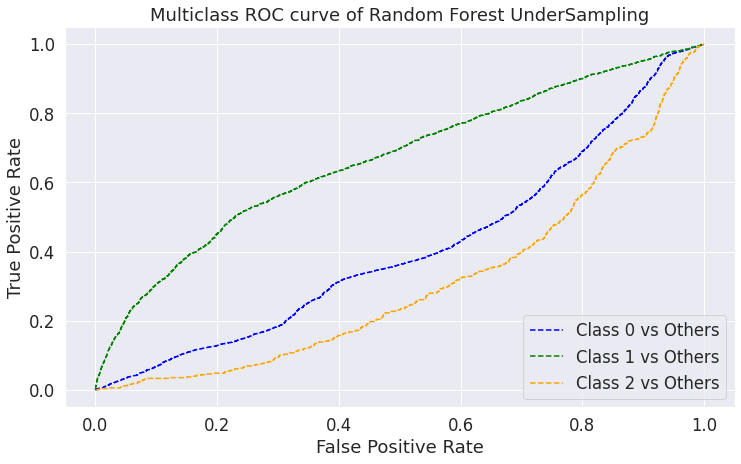

----- Evaluation on SMOTE data -------Random Forest SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[7991 1227 1224]
 [ 790  615  803]
 [ 126   84  265]]
              precision    recall  f1-score   support

           0       0.90      0.77      0.83     10442
           1       0.32      0.28      0.30      2208
           2       0.12      0.56      0.19       475

    accuracy                           0.68     13125
   macro avg       0.44      0.53      0.44     13125
weighted avg       0.77      0.68      0.71     13125



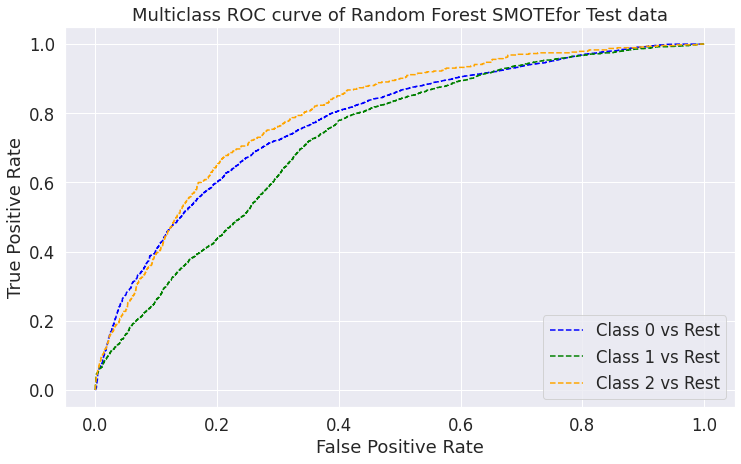

[{'Model_Name': 'Random Forest UnderSampling',
  'Train_Accuracy': 0.541095890410959,
  'Train_Recall': 0.541095890410959,
  'Train_Precision': 0.5591687630540397,
  'Train_F1score': 0.5358712902505152,
  'Train_AUC': 0.728396255204395,
  'Test_Accuracy': 0.15771428571428572,
  'Test_Recall': 0.15771428571428572,
  'Test_Precision': 0.647024028216561,
  'Test_F1score': 0.22799890101168552,
  'Test_AUC': 0.4494639717490726},
 {'Model_Name': 'Random Forest SMOTE',
  'Train_Accuracy': 0.5696991461176283,
  'Train_Recall': 0.5696991461176283,
  'Train_Precision': 0.5554040010203145,
  'Train_F1score': 0.5478964981605371,
  'Train_AUC': 0.7584291126548177,
  'Test_Accuracy': 0.6758857142857143,
  'Test_Recall': 0.6758857142857143,
  'Test_Precision': 0.7716652116886746,
  'Test_F1score': 0.7141241333389428,
  'Test_AUC': 0.769600479986298}]

In [ ]:
rf_eval_list = model_evaluation('Random Forest UnderSampling', 'Random Forest SMOTE', rf_us, rf_smote, X_train_under, y_train_under, X_train_smote, y_train_smote, X_test_scaled, y_test)
rf_eval_list

In [ ]:
#adding list
add_list_to_final_df(rf_eval_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  Train_Precision  \
0   Logistic_Reg UnderSampling        0.494029      0.494029         0.492879   
1           Logistic_Reg SMOTE        0.543237      0.543237         0.527925   
2  Decision Tree UnderSampling        0.615911      0.615911         0.645315   
3          Decision Tree SMOTE        0.633086      0.633086         0.626160   
4  Random Forest UnderSampling        0.541096      0.541096         0.559169   
5          Random Forest SMOTE        0.569699      0.569699         0.555404   

   Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  Test_Precision  \
0       0.491345   0.694503       0.318019     0.318019        0.746465   
1       0.517315   0.724717       0.629029     0.629029        0.768159   
2       0.617861   0.801077       0.158095     0.158095        0.644558   
3       0.620579   0.810097       0.674971     0.674971        0.754525   
4       0.535871   0.728396       0.157714     0.157714        0.647024   
5       0.547896   0.758429       0.675886     0.675886        0.771665   

   Test_F1score  Test_AUC  
0      0.427385  0.573838  
1      0.681994  0.769802  
2      0.224837  0.433862  
3      0.708464  0.743193  
4      0.227999  0.449464  
5      0.714124  0.769600

### **Gradient Boost Model:**

An ensemble learning algorithm that uses the principal of boosting to learn from the mistakes made by the previous weak learners and build model sequencially. 

In [ ]:
# Undersampled training with GB model
gb_us = GradientBoostingClassifier(n_estimators= 200,random_state= 7)
gb_us.fit(X_train_under,y_train_under)

GradientBoostingClassifier(n_estimators=200, random_state=7)

In [ ]:
# oversampling with gradient boost
gb_smote = GradientBoostingClassifier(n_estimators= 200,random_state= 7)
gb_smote.fit(X_train_smote,y_train_smote)

GradientBoostingClassifier(n_estimators=200, random_state=7)

----- Evaluation on Random Undersampled data -----Gradient Boost Classifier UnderSampling------
--------------Test data ---------------

Confusion matrix 

[[1336  396 8710]
 [ 344  395 1469]
 [  75  125  275]]
              precision    recall  f1-score   support

           0       0.76      0.13      0.22     10442
           1       0.43      0.18      0.25      2208
           2       0.03      0.58      0.05       475

    accuracy                           0.15     13125
   macro avg       0.41      0.30      0.17     13125
weighted avg       0.68      0.15      0.22     13125



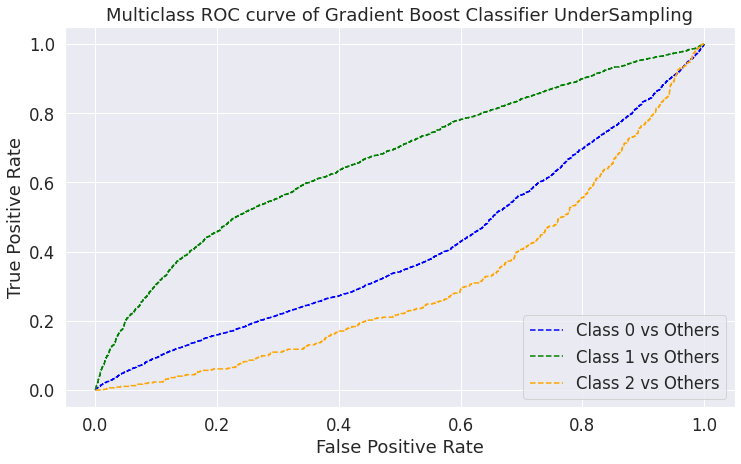

----- Evaluation on SMOTE data -------Gradient Boost Classifier SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[9133  879  430]
 [1221  668  319]
 [ 214  143  118]]
              precision    recall  f1-score   support

           0       0.86      0.87      0.87     10442
           1       0.40      0.30      0.34      2208
           2       0.14      0.25      0.18       475

    accuracy                           0.76     13125
   macro avg       0.47      0.48      0.46     13125
weighted avg       0.76      0.76      0.76     13125



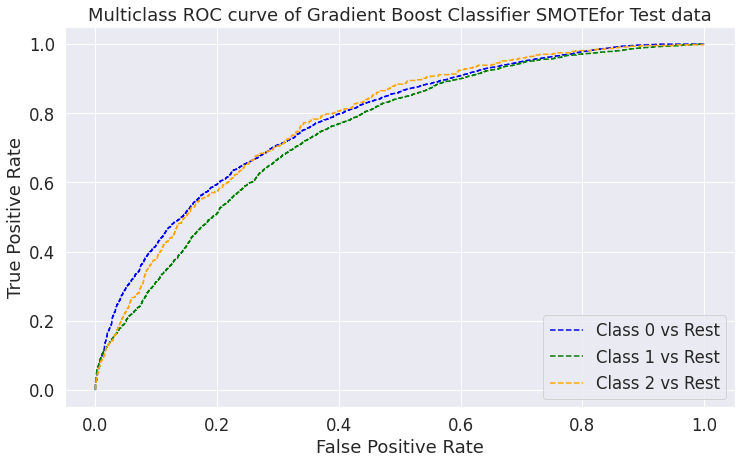

[{'Model_Name': 'Gradient Boost Classifier UnderSampling',
  'Train_Accuracy': 0.6292588689848964,
  'Train_Recall': 0.6292588689848964,
  'Train_Precision': 0.6421191682495812,
  'Train_F1score': 0.6307987616084185,
  'Train_AUC': 0.8071458670376781,
  'Test_Accuracy': 0.15283809523809525,
  'Test_Recall': 0.15283809523809522,
  'Test_Precision': 0.6791348298470642,
  'Test_F1score': 0.218651204190414,
  'Test_AUC': 0.4490562234450416},
 {'Model_Name': 'Gradient Boost Classifier SMOTE',
  'Train_Accuracy': 0.6808634586226159,
  'Train_Recall': 0.6808634586226159,
  'Train_Precision': 0.6716945221682304,
  'Train_F1score': 0.6691062854972728,
  'Train_AUC': 0.8512296139999423,
  'Test_Accuracy': 0.7557333333333334,
  'Test_Recall': 0.7557333333333334,
  'Test_Precision': 0.7589718353369709,
  'Test_F1score': 0.755697504689028,
  'Test_AUC': 0.7740063829054181}]

In [ ]:
gb_eval_list = model_evaluation('Gradient Boost Classifier UnderSampling', 'Gradient Boost Classifier SMOTE', gb_us, gb_smote, X_train_under, y_train_under, X_train_smote, y_train_smote, X_test_scaled, y_test)
gb_eval_list

In [ ]:
# #adding list
add_list_to_final_df(gb_eval_list)
# #Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  \
0               Logistic_Reg UnderSampling        0.494029      0.494029   
1                       Logistic_Reg SMOTE        0.543237      0.543237   
2              Decision Tree UnderSampling        0.615911      0.615911   
3                      Decision Tree SMOTE        0.633086      0.633086   
4              Random Forest UnderSampling        0.541096      0.541096   
5                      Random Forest SMOTE        0.569699      0.569699   
6             SGD Classifier UnderSampling        0.465402      0.465402   
7                     SGD Classifier SMOTE        0.534610      0.534610   
8  Gradient Boost Classifier UnderSampling        0.629259      0.629259   
9          Gradient Boost Classifier SMOTE        0.680863      0.680863   

   Train_Precision  Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  \
0         0.492879       0.491345   0.694503       0.318019     0.318019   
1         0.527925       0.517315   0.724717       0.629029     0.629029   
2         0.645315       0.617861   0.801077       0.158095     0.158095   
3         0.626160       0.620579   0.810097       0.674971     0.674971   
4         0.559169       0.535871   0.728396       0.157714     0.157714   
5         0.555404       0.547896   0.758429       0.675886     0.675886   
6         0.462224       0.461239   0.664304       0.321067     0.321067   
7         0.526680       0.471830   0.720393       0.685410     0.685410   
8         0.642119       0.630799   0.807146       0.152838     0.152838   
9         0.671695       0.669106   0.851230       0.755733     0.755733   

   Test_Precision  Test_F1score  Test_AUC  
0        0.746465      0.427385  0.573838  
1        0.768159      0.681994  0.769802  
2        0.644558      0.224837  0.433862  
3        0.754525      0.708464  0.743193  
4        0.647024      0.227999  0.449464  
5        0.771665      0.714124  0.769600  
6        0.740264      0.427056  0.622749  
7        0.761633      0.705369  0.768750  
8        0.679135      0.218651  0.449056  
9        0.758972      0.755698  0.774006

### **XGBoost Model:**

XGBoost is a fast and optimized ensemble learning model that uses the boosting principal for sequencial learning. The performances of XGBoost model are usually very good.

In [ ]:
# Undersampled training with XGB model
xgb_us = XGBClassifier(n_estimators= 200,random_state= 7)
xgb_us.fit(X_train_under,y_train_under)

XGBClassifier(n_estimators=200, objective='multi:softprob', random_state=7)

In [ ]:
# oversampling with extreme gradient boost model
xgb_smote = XGBClassifier(n_estimators= 200,random_state= 7)
xgb_smote.fit(X_train_smote,y_train_smote)

XGBClassifier(n_estimators=200, objective='multi:softprob', random_state=7)

----- Evaluation on Random Undersampled data -----XGBoost Classifier UnderSampling------
--------------Test data ---------------

Confusion matrix 

[[1499  376 8567]
 [ 393  380 1435]
 [  79  127  269]]
              precision    recall  f1-score   support

           0       0.76      0.14      0.24     10442
           1       0.43      0.17      0.25      2208
           2       0.03      0.57      0.05       475

    accuracy                           0.16     13125
   macro avg       0.41      0.29      0.18     13125
weighted avg       0.68      0.16      0.24     13125



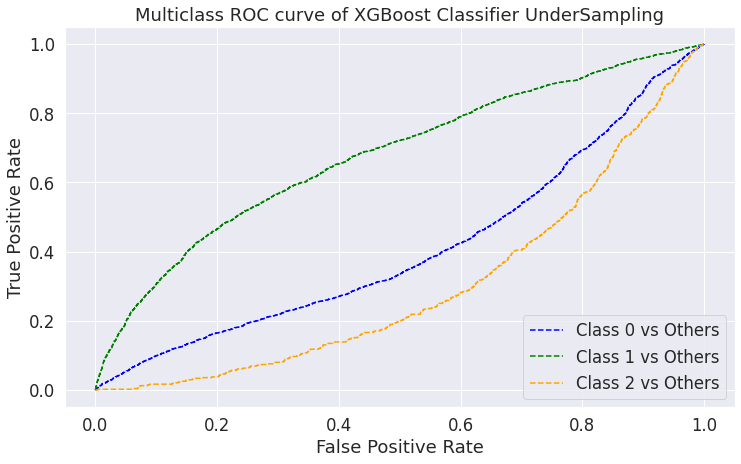

----- Evaluation on SMOTE data -------XGBoost Classifier SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8798 1050  594]
 [1056  753  399]
 [ 183  145  147]]
              precision    recall  f1-score   support

           0       0.88      0.84      0.86     10442
           1       0.39      0.34      0.36      2208
           2       0.13      0.31      0.18       475

    accuracy                           0.74     13125
   macro avg       0.46      0.50      0.47     13125
weighted avg       0.77      0.74      0.75     13125



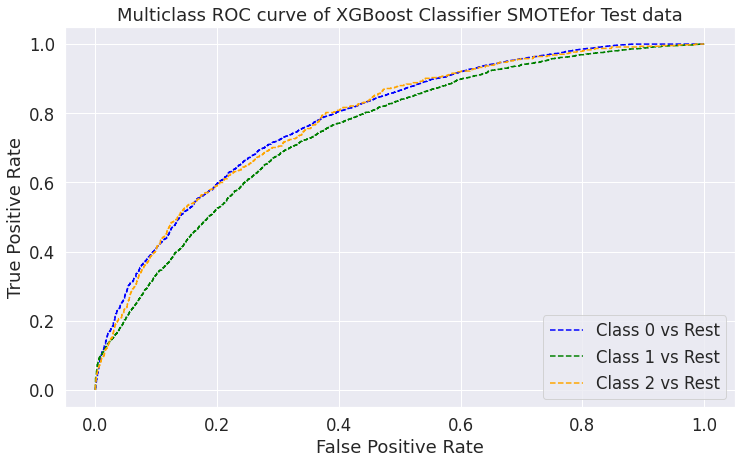

[{'Model_Name': 'XGBoost Classifier UnderSampling',
  'Train_Accuracy': 0.5943097997892518,
  'Train_Recall': 0.5943097997892518,
  'Train_Precision': 0.6081073893939739,
  'Train_F1score': 0.5964246131693642,
  'Train_AUC': 0.7770876059431424,
  'Test_Accuracy': 0.16365714285714286,
  'Test_Recall': 0.16365714285714286,
  'Test_Precision': 0.6784064969690023,
  'Test_F1score': 0.2353245977973387,
  'Test_AUC': 0.4512744348586068},
 {'Model_Name': 'XGBoost Classifier SMOTE',
  'Train_Accuracy': 0.65658766259676,
  'Train_Recall': 0.65658766259676,
  'Train_Precision': 0.6469315249373953,
  'Train_F1score': 0.6428970178604809,
  'Train_AUC': 0.8345747360527219,
  'Test_Accuracy': 0.738895238095238,
  'Test_Recall': 0.738895238095238,
  'Test_Precision': 0.7670673188424497,
  'Test_F1score': 0.7511292012673139,
  'Test_AUC': 0.7777288018252377}]

In [ ]:
xgb_eval_list = model_evaluation('XGBoost Classifier UnderSampling', 'XGBoost Classifier SMOTE', xgb_us, xgb_smote, X_train_under, y_train_under, X_train_smote, y_train_smote, X_test_scaled, y_test)
xgb_eval_list

In [ ]:
# #adding list
add_list_to_final_df(xgb_eval_list)
# #Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  Train_Recall  \
0                Logistic_Reg UnderSampling        0.494029      0.494029   
1                        Logistic_Reg SMOTE        0.543237      0.543237   
2               Decision Tree UnderSampling        0.615911      0.615911   
3                       Decision Tree SMOTE        0.633086      0.633086   
4               Random Forest UnderSampling        0.541096      0.541096   
5                       Random Forest SMOTE        0.569699      0.569699   
6              SGD Classifier UnderSampling        0.465402      0.465402   
7                      SGD Classifier SMOTE        0.534610      0.534610   
8   Gradient Boost Classifier UnderSampling        0.629259      0.629259   
9           Gradient Boost Classifier SMOTE        0.680863      0.680863   
10         XGBoost Classifier UnderSampling        0.594310      0.594310   
11                 XGBoost Classifier SMOTE        0.656588      0.656588   

    Train_Precision  Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  \
0          0.492879       0.491345   0.694503       0.318019     0.318019   
1          0.527925       0.517315   0.724717       0.629029     0.629029   
2          0.645315       0.617861   0.801077       0.158095     0.158095   
3          0.626160       0.620579   0.810097       0.674971     0.674971   
4          0.559169       0.535871   0.728396       0.157714     0.157714   
5          0.555404       0.547896   0.758429       0.675886     0.675886   
6          0.462224       0.461239   0.664304       0.321067     0.321067   
7          0.526680       0.471830   0.720393       0.685410     0.685410   
8          0.642119       0.630799   0.807146       0.152838     0.152838   
9          0.671695       0.669106   0.851230       0.755733     0.755733   
10         0.608107       0.596425   0.777088       0.163657     0.163657   
11         0.646932       0.642897   0.834575       0.738895     0.738895   

    Test_Precision  Test_F1score  Test_AUC  
0         0.746465      0.427385  0.573838  
1         0.768159      0.681994  0.769802  
2         0.644558      0.224837  0.433862  
3         0.754525      0.708464  0.743193  
4         0.647024      0.227999  0.449464  
5         0.771665      0.714124  0.769600  
6         0.740264      0.427056  0.622749  
7         0.761633      0.705369  0.768750  
8         0.679135      0.218651  0.449056  
9         0.758972      0.755698  0.774006  
10        0.678406      0.235325  0.451274  
11        0.767067      0.751129  0.777729

### Top 5 best performing models:

In [ ]:
comparison_df.sort_values(['Test_F1score', 'Test_AUC'], ascending = False).head()

Model_Name  Train_Accuracy  Train_Recall  \
9   Gradient Boost Classifier SMOTE        0.680863      0.680863   
11         XGBoost Classifier SMOTE        0.656588      0.656588   
5               Random Forest SMOTE        0.569699      0.569699   
3               Decision Tree SMOTE        0.633086      0.633086   
7              SGD Classifier SMOTE        0.534610      0.534610   

    Train_Precision  Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  \
9          0.671695       0.669106   0.851230       0.755733     0.755733   
11         0.646932       0.642897   0.834575       0.738895     0.738895   
5          0.555404       0.547896   0.758429       0.675886     0.675886   
3          0.626160       0.620579   0.810097       0.674971     0.674971   
7          0.526680       0.471830   0.720393       0.685410     0.685410   

    Test_Precision  Test_F1score  Test_AUC  
9         0.758972      0.755698  0.774006  
11        0.767067      0.751129  0.777729  
5         0.771665      0.714124  0.769600  
3         0.754525      0.708464  0.743193  
7         0.761633      0.705369  0.768750

## **Feature Importances:**

From Random Forest with Smote:

In [ ]:
#feature importance by random forest 
feature_imp_rf = pd.DataFrame({"Feature": X_train.columns,"Importance": rf_smote.feature_importances_})
feature_imp_rf.sort_values(by="Importance", ascending=False, inplace = True)

In [ ]:
feature_imp_rf

Feature  Importance
1     Total_Past_Communications    0.275662
6       Email_Campaign_Type_2.0    0.238346
0         Subject_Hotness_Score    0.163193
2                    Word_Count    0.127155
3             Total_link_Images    0.091185
7       Email_Campaign_Type_3.0    0.082235
4                Email_Type_2.0    0.017191
5         Email_Source_Type_2.0    0.003354
8  Time_Email_sent_Category_2.0    0.000865
9  Time_Email_sent_Category_3.0    0.000816

From Gradient Boost model with Smote:

In [ ]:
#feature importance by Gradient Boost
feature_imp_gb = pd.DataFrame({"Feature": X_train.columns,"Importance": gb_smote.feature_importances_})
feature_imp_gb.sort_values(by="Importance", ascending=False, inplace = True)

In [ ]:
feature_imp_gb

Feature  Importance
3             Total_link_Images    0.264764
1     Total_Past_Communications    0.237829
0         Subject_Hotness_Score    0.223488
6       Email_Campaign_Type_2.0    0.154223
2                    Word_Count    0.089297
7       Email_Campaign_Type_3.0    0.011950
4                Email_Type_2.0    0.010577
5         Email_Source_Type_2.0    0.004438
9  Time_Email_sent_Category_3.0    0.002687
8  Time_Email_sent_Category_2.0    0.000746

From XGBoost model with Smote:

In [ ]:
#feature importance by XGBoost
feature_imp_xgb = pd.DataFrame({"Feature": X_train.columns,"Importance": xgb_smote.feature_importances_})
feature_imp_xgb.sort_values(by="Importance", ascending=False, inplace = True)

In [ ]:
feature_imp_xgb

Feature  Importance
6       Email_Campaign_Type_2.0    0.445963
7       Email_Campaign_Type_3.0    0.180632
1     Total_Past_Communications    0.090149
0         Subject_Hotness_Score    0.081443
3             Total_link_Images    0.069686
2                    Word_Count    0.055639
4                Email_Type_2.0    0.032160
9  Time_Email_sent_Category_3.0    0.020572
5         Email_Source_Type_2.0    0.015406
8  Time_Email_sent_Category_2.0    0.008349

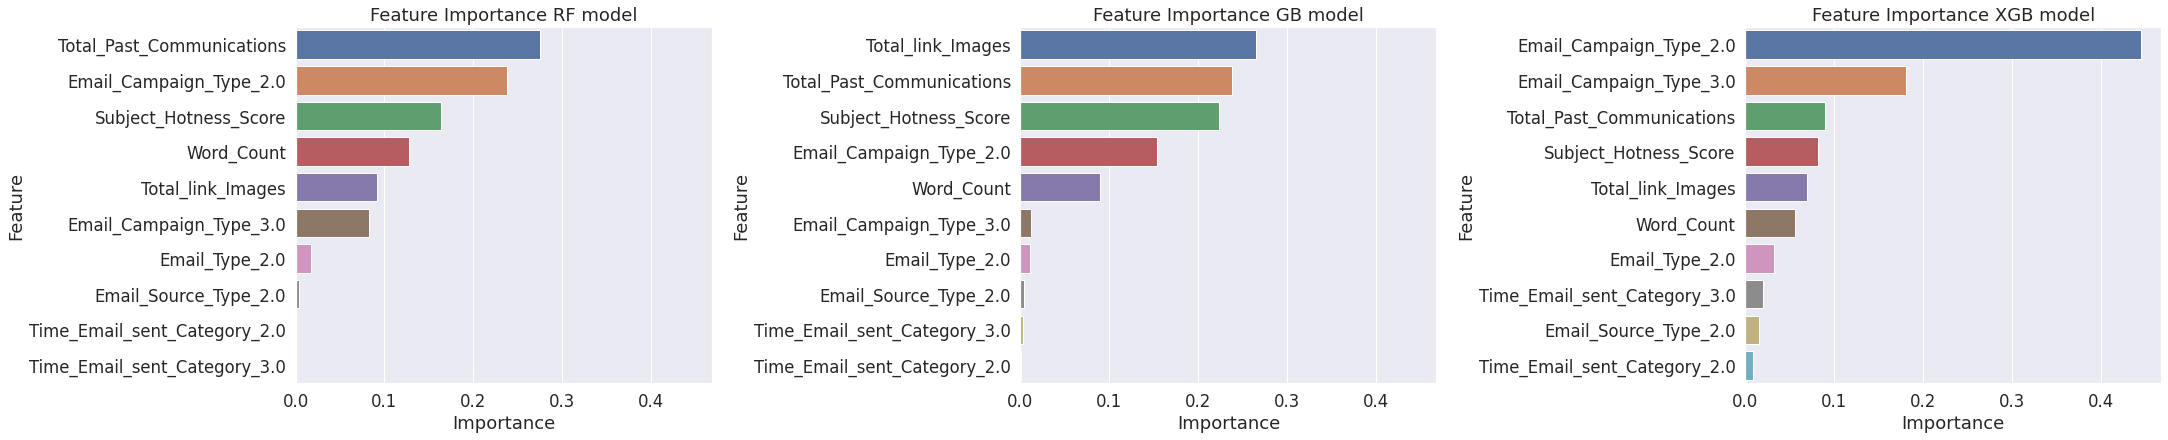

In [ ]:
#visualisation of feature importances
fig, ax = plt.subplots(1, 3, sharex=True, figsize=(30,6), constrained_layout=True)

sns.barplot(x=feature_imp_rf['Importance'],y= feature_imp_rf['Feature'], ax=ax[0])
ax[0].set_title('Feature Importance RF model')
sns.barplot(x=feature_imp_gb['Importance'],y= feature_imp_gb['Feature'], ax=ax[1])
ax[1].set_title('Feature Importance GB model')
sns.barplot(x=feature_imp_xgb['Importance'],y= feature_imp_xgb['Feature'], ax=ax[2])
ax[2].set_title('Feature Importance XGB model')
fig.show()

We can see that according to all 3 models, the least important features are 'Time_Email_Sent_Category_2.0' & 'Time_Email_Sent_Category_3.0'. 

We shall drop these two columns and then do the hyper-parameter tuning and check the performance.

In [ ]:
# Considering only Important Features
X_imp = X.drop(['Time_Email_sent_Category_2.0', 'Time_Email_sent_Category_3.0', 'Email_Source_Type_2.0'], axis = 1)
# X_imp = X.drop(['Time_Email_sent_Category_2.0', 'Time_Email_sent_Category_3.0'], axis = 1)
X_imp

Subject_Hotness_Score  Total_Past_Communications  Word_Count  \
0                        2.2                       33.0       440.0   
1                        2.1                       15.0       504.0   
2                        0.1                       36.0       962.0   
3                        3.0                       25.0       610.0   
4                        0.0                       18.0       947.0   
...                      ...                        ...         ...   
68348                    0.4                       22.0       737.0   
68349                    1.3                       40.0       653.0   
68350                    2.2                       33.0       490.0   
68351                    0.4                       50.0       733.0   
68352                    1.5                       20.0      1038.0   

       Total_link_Images  Email_Type_2.0  Email_Campaign_Type_2.0  \
0                    8.0               0                        1   
1                    5.0               1                        1   
2                    5.0               1                        0   
3                   16.0               0                        1   
4                    4.0               0                        0   
...                  ...             ...                      ...   
68348               29.0               1                        1   
68349               47.0               0                        1   
68350                9.0               0                        1   
68351               18.0               0                        1   
68352                6.0               0                        1   

       Email_Campaign_Type_3.0  
0                            0  
1                            0  
2                            1  
3                            0  
4                            1  
...                        ...  
68348                        0  
68349                        0  
68350                        0  
68351                        0  
68352                        0  

[65624 rows x 7 columns]

In [ ]:
# doing the train_test_split on our data
X_imp_train, X_imp_test, y_train, y_test = train_test_split( X_imp, y , test_size = 0.2, random_state = 7, stratify=y) 


# scaling
scaler = MinMaxScaler()

# transform data
X_imp_train_scaled = scaler.fit_transform(X_imp_train)
X_imp_test_scaled = scaler.transform(X_imp_test)

In [ ]:
X_imp_train

Subject_Hotness_Score  Total_Past_Communications  Word_Count  \
54600                    2.2                  25.000000       146.0   
67234                    0.1                  10.000000       593.0   
32920                    1.1                  40.000000       605.0   
41731                    1.5                  12.000000      1216.0   
56160                    1.7                  45.000000       389.0   
...                      ...                        ...         ...   
22412                    1.1                   7.000000      1271.0   
32196                    0.2                   0.000000       565.0   
22766                    0.2                  50.000000       578.0   
61241                    0.3                  57.000000       282.0   
10937                    2.2                  19.090044       778.0   

       Total_link_Images  Email_Type_2.0  Email_Campaign_Type_2.0  \
54600           6.344997               0                        1   
67234           6.000000               1                        1   
32920          29.000000               0                        1   
41731           4.000000               1                        1   
56160           5.000000               0                        1   
...                  ...             ...                      ...   
22412          14.000000               0                        1   
32196           1.000000               1                        0   
22766          19.000000               0                        0   
61241           6.000000               1                        0   
10937           9.000000               0                        1   

       Email_Campaign_Type_3.0  
54600                        0  
67234                        0  
32920                        0  
41731                        0  
56160                        0  
...                        ...  
22412                        0  
32196                        0  
22766                        1  
61241                        1  
10937                        0  

[52499 rows x 7 columns]

In [ ]:
# undersampling training data
X_imp_train_under , y_train_under = nm.fit_resample(X_imp_train_scaled, y_train)

In [ ]:
# oversampling training data with SMOTE
X_imp_train_smote , y_train_smote = smote.fit_resample(X_imp_train_scaled, y_train)

## **Hyperparameter Tuning:**

**Random Forest Hyperparameter Tuning:**

In [ ]:
#classifier
rf = RandomForestClassifier(random_state=7, n_jobs=-1)

In [ ]:
#Parameter dictionary
params = {'max_depth': [3,5,10,20],'min_samples_leaf': [5,10,20,50],'n_estimators': [100,200,500]}

In [ ]:
#Undersampled fitting
# randomized_search_under = RandomizedSearchCV(estimator=rf, param_distributions=params, cv = 3, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_under = GridSearchCV(estimator=rf, param_grid=params, cv = 3, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_under.fit(X_imp_train_under,y_train_under)
#optimal undersampled model
rf_tuned_under = grid_search_under.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


In [ ]:
#Fitting SMOTE
# randomized_search_smote = RandomizedSearchCV(estimator=rf, param_distributions=params, cv = 3, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote = GridSearchCV(estimator=rf, param_grid=params, cv = 3, n_jobs=-1, verbose=1, scoring="f1_weighted")
grid_search_smote.fit(X_imp_train_smote,y_train_smote)
#optimal smote model
rf_tuned_smote = grid_search_smote.best_estimator_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


----- Evaluation on Random Undersampled data -----RandomForest Tuned & F-Selected Undersampling------
--------------Test data ---------------

Confusion matrix 

[[1050  228 9164]
 [ 382  374 1452]
 [ 105  138  232]]
              precision    recall  f1-score   support

           0       0.68      0.10      0.18     10442
           1       0.51      0.17      0.25      2208
           2       0.02      0.49      0.04       475

    accuracy                           0.13     13125
   macro avg       0.40      0.25      0.16     13125
weighted avg       0.63      0.13      0.18     13125



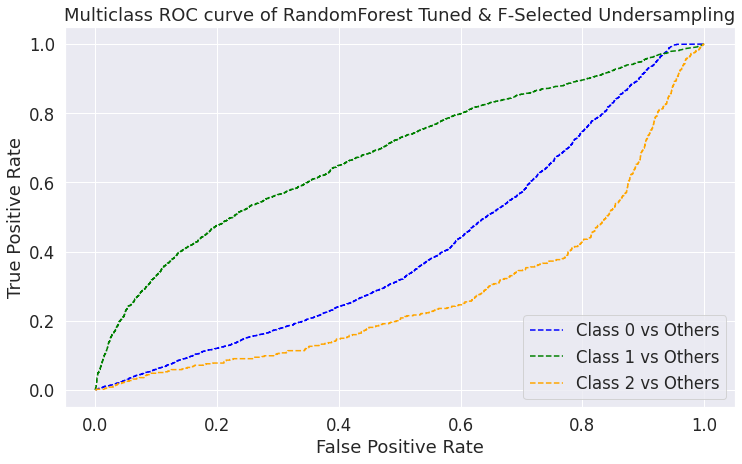

----- Evaluation on SMOTE data -------RandomForest Tuned & F-Selected SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[8919 1158  365]
 [1087  843  278]
 [ 190  198   87]]
              precision    recall  f1-score   support

           0       0.87      0.85      0.86     10442
           1       0.38      0.38      0.38      2208
           2       0.12      0.18      0.14       475

    accuracy                           0.75     13125
   macro avg       0.46      0.47      0.46     13125
weighted avg       0.76      0.75      0.76     13125



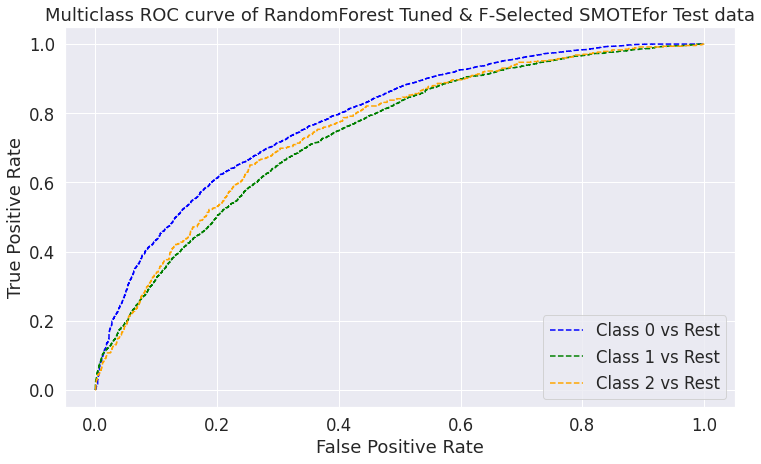

[{'Model_Name': 'RandomForest Tuned & F-Selected Undersampling',
  'Train_Accuracy': 0.5927291886195996,
  'Train_Recall': 0.5927291886195996,
  'Train_Precision': 0.6147461189628393,
  'Train_F1score': 0.5950269692679787,
  'Train_AUC': 0.7865658599091051,
  'Test_Accuracy': 0.12617142857142857,
  'Test_Recall': 0.12617142857142857,
  'Test_Precision': 0.6292979397629412,
  'Test_F1score': 0.18363863471900405,
  'Test_AUC': 0.45118148658851415},
 {'Model_Name': 'RandomForest Tuned & F-Selected SMOTE',
  'Train_Accuracy': 0.8930332774718698,
  'Train_Recall': 0.8930332774718698,
  'Train_Precision': 0.8931808625125572,
  'Train_F1score': 0.8923165639200173,
  'Train_AUC': 0.9797919002387127,
  'Test_Accuracy': 0.7504,
  'Test_Recall': 0.7504,
  'Test_Precision': 0.76474281721203,
  'Test_F1score': 0.7572284287535709,
  'Test_AUC': 0.7775746933838585}]

In [ ]:
#Model Evaluation for Random Forest Hyperparameter 
rf_tuned_list = model_evaluation('RandomForest Tuned & F-Selected Undersampling', 'RandomForest Tuned & F-Selected SMOTE', rf_tuned_under, rf_tuned_smote,X_imp_train_under, y_train_under, X_imp_train_smote, y_train_smote, X_imp_test_scaled, y_test)
rf_tuned_list

In [ ]:
# comparison_df.clear()

In [ ]:
#adding list
add_list_to_final_df(rf_tuned_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  \
0                      Logistic_Reg UnderSampling        0.494029   
1                              Logistic_Reg SMOTE        0.543237   
2                     Decision Tree UnderSampling        0.615911   
3                             Decision Tree SMOTE        0.633086   
4                     Random Forest UnderSampling        0.541096   
5                             Random Forest SMOTE        0.569699   
6                    SGD Classifier UnderSampling        0.465402   
7                            SGD Classifier SMOTE        0.534610   
8         Gradient Boost Classifier UnderSampling        0.629259   
9                 Gradient Boost Classifier SMOTE        0.680863   
10               XGBoost Classifier UnderSampling        0.594310   
11                       XGBoost Classifier SMOTE        0.656588   
12  RandomForest Tuned & F-Selected Undersampling        0.592729   
13          RandomForest Tuned & F-Selected SMOTE        0.893033   

    Train_Recall  Train_Precision  Train_F1score  Train_AUC  Test_Accuracy  \
0       0.494029         0.492879       0.491345   0.694503       0.318019   
1       0.543237         0.527925       0.517315   0.724717       0.629029   
2       0.615911         0.645315       0.617861   0.801077       0.158095   
3       0.633086         0.626160       0.620579   0.810097       0.674971   
4       0.541096         0.559169       0.535871   0.728396       0.157714   
5       0.569699         0.555404       0.547896   0.758429       0.675886   
6       0.465402         0.462224       0.461239   0.664304       0.321067   
7       0.534610         0.526680       0.471830   0.720393       0.685410   
8       0.629259         0.642119       0.630799   0.807146       0.152838   
9       0.680863         0.671695       0.669106   0.851230       0.755733   
10      0.594310         0.608107       0.596425   0.777088       0.163657   
11      0.656588         0.646932       0.642897   0.834575       0.738895   
12      0.592729         0.614746       0.595027   0.786566       0.126171   
13      0.893033         0.893181       0.892317   0.979792       0.750400   

    Test_Recall  Test_Precision  Test_F1score  Test_AUC  
0      0.318019        0.746465      0.427385  0.573838  
1      0.629029        0.768159      0.681994  0.769802  
2      0.158095        0.644558      0.224837  0.433862  
3      0.674971        0.754525      0.708464  0.743193  
4      0.157714        0.647024      0.227999  0.449464  
5      0.675886        0.771665      0.714124  0.769600  
6      0.321067        0.740264      0.427056  0.622749  
7      0.685410        0.761633      0.705369  0.768750  
8      0.152838        0.679135      0.218651  0.449056  
9      0.755733        0.758972      0.755698  0.774006  
10     0.163657        0.678406      0.235325  0.451274  
11     0.738895        0.767067      0.751129  0.777729  
12     0.126171        0.629298      0.183639  0.451181  
13     0.750400        0.764743      0.757228  0.777575

**XGBoost Hyperparameter Tuning:**

In [ ]:
#classifier
xgb = XGBClassifier(random_state=7)

In [ ]:
#Parameter dictionary
params = {'n_estimators': [100,250,500], 'learning_rate': [0.1, 0.3, 0.5]}

In [ ]:
#Undersampled fitting
# randomized_search_under = RandomizedSearchCV(estimator=xgb, param_distributions=params, cv = 3, verbose=1, scoring="f1_weighted")
grid_search_under = GridSearchCV(estimator=xgb, param_grid=params, cv = 3, verbose=1, scoring="f1_weighted")
grid_search_under.fit(X_imp_train_under,y_train_under)
#optimal undersampled model
xgb_tuned_under = grid_search_under.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
#Fitting SMOTE
# randomized_search_smote = RandomizedSearchCV(estimator=xgb, param_distributions=params, cv = 3, verbose=1, scoring="f1_weighted")
grid_search_smote = GridSearchCV(estimator=xgb, param_grid=params, cv = 3, verbose=1, scoring="f1_weighted")

grid_search_smote.fit(X_imp_train_smote,y_train_smote)
#optimal smote model
xgb_tuned_smote = grid_search_smote.best_estimator_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


In [ ]:
grid_search_smote.best_params_

{'learning_rate': 0.5, 'n_estimators': 500}

----- Evaluation on Random Undersampled data -----XGBoost Tuned & F-Selected Undersampling------
--------------Test data ---------------

Confusion matrix 

[[1230  301 8911]
 [ 391  371 1446]
 [  93  139  243]]
              precision    recall  f1-score   support

           0       0.72      0.12      0.20     10442
           1       0.46      0.17      0.25      2208
           2       0.02      0.51      0.04       475

    accuracy                           0.14     13125
   macro avg       0.40      0.27      0.16     13125
weighted avg       0.65      0.14      0.20     13125



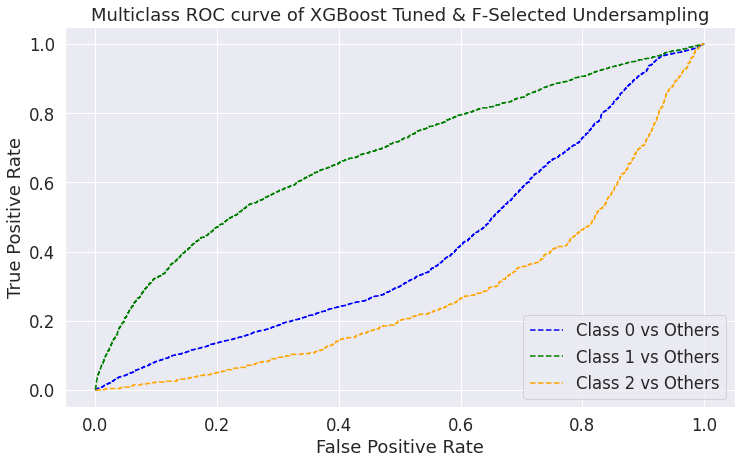

----- Evaluation on SMOTE data -------XGBoost Tuned & F-Selected SMOTE-----
---------------Test data ---------------

Confusion matrix 

[[9882  489   71]
 [1523  576  109]
 [ 286  150   39]]
              precision    recall  f1-score   support

           0       0.85      0.95      0.89     10442
           1       0.47      0.26      0.34      2208
           2       0.18      0.08      0.11       475

    accuracy                           0.80     13125
   macro avg       0.50      0.43      0.45     13125
weighted avg       0.76      0.80      0.77     13125



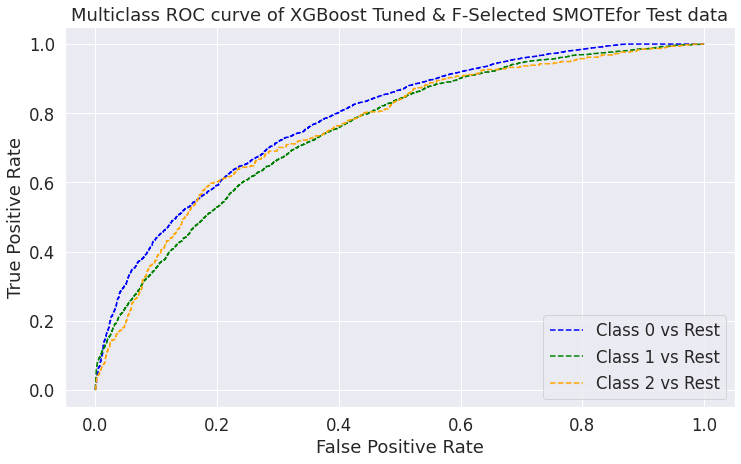

[{'Model_Name': 'XGBoost Tuned & F-Selected Undersampling',
  'Train_Accuracy': 0.6023884791008078,
  'Train_Recall': 0.6023884791008078,
  'Train_Precision': 0.6184964341198417,
  'Train_F1score': 0.6041232840982412,
  'Train_AUC': 0.7906204902800094,
  'Test_Accuracy': 0.1404952380952381,
  'Test_Recall': 0.1404952380952381,
  'Test_Precision': 0.6487119668499606,
  'Test_F1score': 0.20393588512622762,
  'Test_AUC': 0.4503153418636851},
 {'Model_Name': 'XGBoost Tuned & F-Selected SMOTE',
  'Train_Accuracy': 0.7964009257042535,
  'Train_Recall': 0.7964009257042535,
  'Train_Precision': 0.7942861785590689,
  'Train_F1score': 0.7893269559083327,
  'Train_AUC': 0.9231226913491075,
  'Test_Accuracy': 0.7997714285714286,
  'Test_Recall': 0.7997714285714286,
  'Test_Precision': 0.7586748857978799,
  'Test_F1score': 0.7711104682151113,
  'Test_AUC': 0.7796621922763208}]

In [ ]:
#Model Evaluation for Gradient Boost Hyperparameter 
xgb_tuned_list = model_evaluation('XGBoost Tuned & F-Selected Undersampling', 'XGBoost Tuned & F-Selected SMOTE', xgb_tuned_under, xgb_tuned_smote,X_imp_train_under, y_train_under, X_imp_train_smote, y_train_smote, X_imp_test_scaled, y_test)
xgb_tuned_list

In [ ]:
#adding list
add_list_to_final_df(xgb_tuned_list)
#Taking a look of our final comparison dataframe
comparison_df

Model_Name  Train_Accuracy  \
0                      Logistic_Reg UnderSampling        0.494029   
1                              Logistic_Reg SMOTE        0.543237   
2                     Decision Tree UnderSampling        0.615911   
3                             Decision Tree SMOTE        0.633086   
4                     Random Forest UnderSampling        0.541096   
5                             Random Forest SMOTE        0.569699   
6                    SGD Classifier UnderSampling        0.465402   
7                            SGD Classifier SMOTE        0.534610   
8         Gradient Boost Classifier UnderSampling        0.629259   
9                 Gradient Boost Classifier SMOTE        0.680863   
10               XGBoost Classifier UnderSampling        0.594310   
11                       XGBoost Classifier SMOTE        0.656588   
12  RandomForest Tuned & F-Selected Undersampling        0.592729   
13          RandomForest Tuned & F-Selected SMOTE        0.893033   
14       XGBoost Tuned & F-Selected Undersampling        0.602388   
15               XGBoost Tuned & F-Selected SMOTE        0.796401   

    Train_Recall  Train_Precision  Train_F1score  Train_AUC  Test_Accuracy  \
0       0.494029         0.492879       0.491345   0.694503       0.318019   
1       0.543237         0.527925       0.517315   0.724717       0.629029   
2       0.615911         0.645315       0.617861   0.801077       0.158095   
3       0.633086         0.626160       0.620579   0.810097       0.674971   
4       0.541096         0.559169       0.535871   0.728396       0.157714   
5       0.569699         0.555404       0.547896   0.758429       0.675886   
6       0.465402         0.462224       0.461239   0.664304       0.321067   
7       0.534610         0.526680       0.471830   0.720393       0.685410   
8       0.629259         0.642119       0.630799   0.807146       0.152838   
9       0.680863         0.671695       0.669106   0.851230       0.755733   
10      0.594310         0.608107       0.596425   0.777088       0.163657   
11      0.656588         0.646932       0.642897   0.834575       0.738895   
12      0.592729         0.614746       0.595027   0.786566       0.126171   
13      0.893033         0.893181       0.892317   0.979792       0.750400   
14      0.602388         0.618496       0.604123   0.790620       0.140495   
15      0.796401         0.794286       0.789327   0.923123       0.799771   

    Test_Recall  Test_Precision  Test_F1score  Test_AUC  
0      0.318019        0.746465      0.427385  0.573838  
1      0.629029        0.768159      0.681994  0.769802  
2      0.158095        0.644558      0.224837  0.433862  
3      0.674971        0.754525      0.708464  0.743193  
4      0.157714        0.647024      0.227999  0.449464  
5      0.675886        0.771665      0.714124  0.769600  
6      0.321067        0.740264      0.427056  0.622749  
7      0.685410        0.761633      0.705369  0.768750  
8      0.152838        0.679135      0.218651  0.449056  
9      0.755733        0.758972      0.755698  0.774006  
10     0.163657        0.678406      0.235325  0.451274  
11     0.738895        0.767067      0.751129  0.777729  
12     0.126171        0.629298      0.183639  0.451181  
13     0.750400        0.764743      0.757228  0.777575  
14     0.140495        0.648712      0.203936  0.450315  
15     0.799771        0.758675      0.771110  0.779662

## **Conclusion:**


---

Email campaign is a very popular and effective way of marketing. It can help converting potential clients, sustaining old clients and most importantly it leaves room for experimentations. 
Being able to understand a customer's preference and consumer habits can help build a long-term relatioship and trust between a brand and the customer. So, it becomes crucial for a business to figure out the Do's and Don'ts to provide a decent experience.

In this project, we tried to find out exactly those factors that influence the effectiveness of marketing through Email campaigns. Here's the summary of what we found -

### **Observations**:

### Exploratory Data Analysis:

This is the step of understanding the data using various statistics and visualizations and draw business insights. During the EDA, we found-



*   The demographic of potential clients does not have an influence on that person ignoring, reading or acknowledging to email campaigns. We noticed that the distributions for the client's responce remains more or less similar regardless of where the person lives. For the data that we have, it is wise to not consider Customer Location as an influencing factor.
*   Email_Campaign_Type 1 was sent the least number of times which had the best probability of being read and acknowledged. Email_Campaign_Type 2 was sent most and it was ignored the most. 

*   The time of day when the email was sent does not have much of an impact on the responce that was received. We found that during the feature importance evaluation as well.
*   There were outliers for all the numeric columns except for Word count column.

*   Total communications made prior is a very important factor to consider if we want to avoid emails being ignored. It was observed that, more the businesses kept in touch with the potential customers, the chances of the next emails being read and acknowledged increased. 

*   The emails with lower Subject Hotness Score were read and acknowledged more.
*   Emails with high number of links and images were ignored more.
*   Emails that were too lenthy, have a higher chance of being ignored.
*   Among all the numeric features, Total Images and Total Links were highly correlated. So, during the feature engineering, we merged these two columns to create a new column that would have the essence of both these columns.

### Evaluation Metrics:

Before discussing about the models and performances, it is crucial to understand which metric would be the best evaluator for this problem statement.

Since, the dataset was highly imbalanced and also it was a multiclass classification problem, we need to decide carefully which metric is the best choice for us.

**Metrics:**

* Accuracy- Accuracy is the measurement of how often the classifier correctly predicts. Definition of accuracy is basically the ratio of the number of correct predictions to the total number of predictions that were made. Accuracy is useful when the target classes are balanced. But it is not the right choice for the imbalanced classes, because even if the model predicts every observation to be of the majority class, there is a high chance that we will still get a good accuracy.

* Confusion Matrix - It is a performance measurement criteria for the machine learning classification problems where we get a table with a combination of predicted and actual values. We can see the correct predictions in the diagonal elements of the matrix.

* Precision - Precision for a label is defined as the number of true positives divided by the total number of positives that were predicted.

* Recall - Recall for a label is defined as the number of true positives divided by the total number of actual positives. Recall explains how many of the actual positive cases we were able to predict correctly with our model.

* F1 Score - It's actually the harmonic mean of Precision and Recall. It is maximum when Precision is equal to Recall.

* AUC ROC - The Area Under the Curve (AUC) is the measure of the ability of a classifier to distinguish between classes. When AUC is 0.5, the classifier is not able to distinguish between the classes and when it's closer to 1,the more good it becomes in distingushing them.

Now, coming back to the topic of which one of these to use, we must keep in mind that for an imbalanced dataset with multiclass classification problem, it is necesary to keep an eye on the false positives and negatives. Since our problem statement clearly tells us to characterize the mail and track the mail that is ignored; read; acknowledged by the reader, We need to prioritize to get as less false predictions as possible for all the different classes in our target.

For this reason, We chose <b>F1 Score</b> and <b>Roc-Auc Score</b> as the best candidate for model evaluation. These metrics consider both false positives and false negatives. Getting a decent score for these two metrics mean that both false positives and negatives are low in number. 

### Modelling Approach:



* To handle the class imbalance problem, we used undersampling and oversampling both.
* We used SMOTE (synthetic Minority Oversampling Technique) for oversampling as it creates synthetic data for the minority classes instead of simply just copying the existing observations.
* We noticed that in every case, Machine Learning models with SMOTE outperformed the undersampling methods.
* Since we were having some outliers for the minority class, we decided to use more tree based and ensemble learning algorithms to mitigate the impact of outliers as much as possible.
* We checked and compared the feature importances for 3 different ensemble models and discarded the two of least contributing features. These two features were 'Time_Email_Sent_Category' and 'Email_Source_Type'.
* We boosted the model performance for Random Forest and XGBoost model, performing hyper-parameter tuning with grid search and cross validation.

### *Scores & Performances:*

In [ ]:
# top 10 performing models sorted by Test F1_Score and Test AUC_Roc Score
top_models = comparison_df.sort_values(['Test_F1score', 'Test_AUC'], ascending = False).head(10)

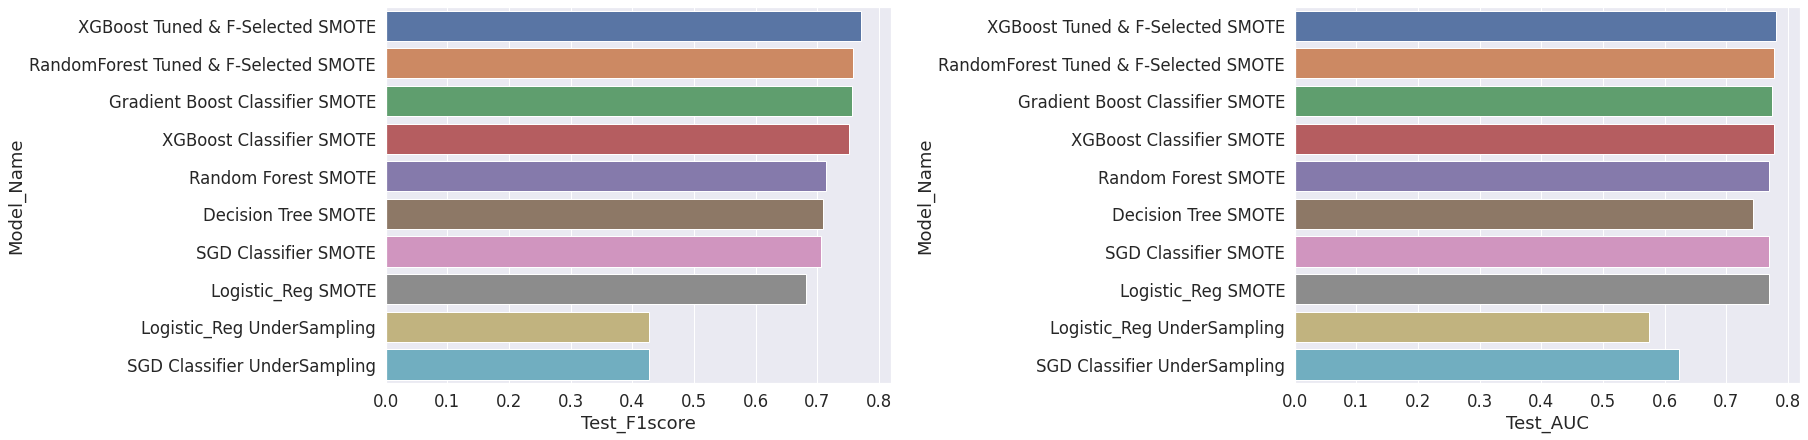

In [ ]:
# visualizing scores
fig, ax = plt.subplots(1, 2, sharex=True, figsize=(25,6), constrained_layout=True)

#visualising for f1 test score
sns.barplot(x= top_models['Test_F1score'], y = top_models['Model_Name'], ax=ax[0])
# plt.show()

#visualising for test Roc Auc Score
sns.barplot(data=top_models, x="Test_AUC", y="Model_Name", ax=ax[1])
fig.show()

### *Top performing models:*

In [ ]:
print('The top 3 performing models and their scores :')
print('\n')
top_models.head(3)

The top 3 performing models and their scores :




Model_Name  Train_Accuracy  Train_Recall  \
15       XGBoost Tuned & F-Selected SMOTE        0.796401      0.796401   
13  RandomForest Tuned & F-Selected SMOTE        0.893033      0.893033   
9         Gradient Boost Classifier SMOTE        0.680863      0.680863   

    Train_Precision  Train_F1score  Train_AUC  Test_Accuracy  Test_Recall  \
15         0.794286       0.789327   0.923123       0.799771     0.799771   
13         0.893181       0.892317   0.979792       0.750400     0.750400   
9          0.671695       0.669106   0.851230       0.755733     0.755733   

    Test_Precision  Test_F1score  Test_AUC  
15        0.758675      0.771110  0.779662  
13        0.764743      0.757228  0.777575  
9         0.758972      0.755698  0.774006

### **Model Selection:**

* Hyperparameters tuned **XGBoost** model with the most relevant features selected performs the best. It has the F1 Score of 0.77. The Accuracy, precision and Recall scores are also overall better for this model.

* At 2nd & 3rd, we have **Gradient Boost** and **Random Forest** Model with feature selection.